## Install Python 3.8

See [stackoverflow](https://stackoverflow.com/a/70993829)

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!conda install python=3.8

In [3]:
!python --version

Python 3.8.2


## Install forceatlas2

In [ ]:
!git clone https://github.com/CamilleR215/forceatlas2

In [ ]:
%cd forceatlas2
%ls -lrth

In [ ]:
!pip install . --user

In [7]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

# positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

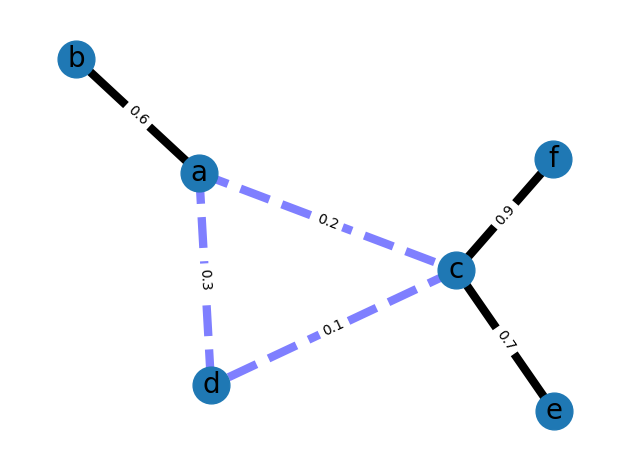

In [8]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

#Libraries

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from scipy.io import loadmat
import seaborn as sns
from matplotlib import colors as mcolors
import math

#Loading Data

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
file_path = '/content/drive/My Drive/Donders/OS_Basic_RGS14/model_geoff/all_AWNTR_in_order'

In [12]:
latent_states = np.load(file_path + '/latentStates.npz')
unique_states = np.load(file_path + '/uniqueStates.npz')
obs_keys = np.load(file_path + '/obsKeys.npz')

In [13]:
inferredStates = latent_states['inferredStates']
inferredStates[:, 0] -= 1
uniqueStates = unique_states['uniqueStates']
obsKeys = obs_keys['obsKeys']

manualStates = inferredStates[:, 1]
latentStates = inferredStates[:, 0]

nLS = uniqueStates.shape[0]
LS = [f"LS-{i+1}" for i in range(nLS)]

In [14]:
inferredStates.shape, uniqueStates.shape, manualStates.shape, latentStates.shape, obsKeys.shape

((608100, 2), (102, 23), (608100,), (608100,), (608100, 5))

In [15]:
#We take the length of each posttrial in their order of apparition in the input files for the mcRBM algorithm
len_posttrials = np.array([1338, 1351, 1339, 1367, 5080, 1359, 1350, 1382, 1337, 5370, 1341, 1338, 1342, 1343, 5138, 1349, 1341, 1394, 1369, 5410, 1187, 1375, 1466, 5093, 1395, 1343, 1346, 1347, 5453, 1346, 1346, 1346, 1346, 5460, 1346, 1346, 1350, 1346, 5267, 1347, 1346, 1346, 1346, 5118, 1347, 1346, 1346, 1347, 5397, 1347, 1348, 1346, 1346, 5400, 1346, 1348, 1346, 1346, 5405, 1346, 1346, 1346, 1346, 5402, 1346, 1346, 1348, 5399, 1346, 1347, 1360, 1361, 5366, 1346, 1346, 1346, 1346, 5403, 302, 1346, 1346, 1346, 5387, 1346, 1346, 1346, 1346, 5377, 1346, 1346, 1346, 1346, 5411, 1346, 1136, 1346, 1346, 5413, 1346, 1346, 1348, 1346, 4805, 1346, 1346, 1346, 1346, 5453, 1346, 1346, 1346, 1346, 5396, 1347, 1346, 1347, 1346, 5396, 1346, 1346, 1346, 1349, 5397, 1346, 1346, 1348, 1346, 5398, 1346, 1346, 1346, 1346, 4455, 1346, 1346, 1346, 1346, 5104, 1346, 1346, 1346, 5396, 1346, 1346, 1346, 1346, 1346, 1346, 1346, 1346, 5396, 1346, 1346, 1346, 1350, 5170, 1346, 1346, 1346, 1346, 5396, 1346, 1346, 1346, 1346, 5396, 1346, 1235, 1349, 1346, 5412, 1346, 1362, 1355, 1346, 5396, 1346, 1346, 1346, 1346, 5396, 1347, 1347, 1346, 1347, 5396, 958, 1346, 1346, 1346, 5396, 1349, 1346, 1346, 1346, 5399, 1346, 1347, 1354, 1346, 5398, 1346, 1361, 1352, 1421, 5415, 1345, 1347, 1346, 1351, 5408, 1345, 1465, 1346, 1355, 5396, 1345, 1346, 1405, 1345, 5396, 1346, 1346, 1346, 1372, 5375, 1346, 1346, 1346, 1345, 5036, 1346, 1345, 1346, 1346, 5396, 1345, 1465, 1345, 1346, 5396, 1346, 1350, 1364, 1346, 5396, 1579, 1346, 1346, 1378, 5231, 1345, 1345, 1346, 1345, 2502, 1345, 1345, 1343, 1346, 5405, 1345, 1345, 1345, 1345, 5002, 1346, 1346, 1347, 1346, 5396, 1366, 1366, 1346, 1352, 5394, 1346, 1345, 1345, 1345, 5395, 1345, 1346, 1346, 1345, 5396])

In [16]:
index_end_posttrials = np.empty(np.shape(len_posttrials))
len_tot = 0
for i in range(len(index_end_posttrials)):
  len_tot += len_posttrials[i]
  index_end_posttrials[i] = len_tot - 1

In [17]:
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'grey', 'red'])

In [18]:
features = np.load(file_path + '/OS_Basic_RGS14_Control_all_AWNTR_in_order_dataset.npy')

#Constants

In [19]:
EEG_labels = ['', 'IndexW', 'IndexR', 'IndexN', 'Index1', 'Index2', 'Index3', 'Index4', '0-0.5hz', 'Theta', 'Delta']

In [20]:
EEG_range = [0,2]

#Functions

In [21]:
#@title Z-Score
def z_score(array):
  maxi = max(array)
  mini = min(array)
  z_score_array = np.empty(np.shape(array))
  c = 0
  for i in range(len(array)):
    z_score_array[i] = (array[i] - mini) / (maxi - mini)
  return z_score_array

##Transition Matrix Computation

In [22]:
#@title transition_matrix
# Function to calculate the transition matrix
def transition_matrix(transitions):
    """
    Parameter :
    - transitions (np.darray) : matrix of latent states in temporal order.
    Returns :
    - Matrix containing the probability of transition between each latent state.
    We here consider both previous and following latent states.
    """
    # Identify the unique states
    states = sorted(set(transitions))
    # Create a dictionary to map states to indices
    state_indices = {state: i for i, state in enumerate(states)}
    # Initialize the transition matrix with zeros
    num_states = len(states)
    M = np.zeros((num_states, num_states))
    # Populate the transition counts
    for n, (i, j) in enumerate(zip(transitions, transitions[1:])):
        #We exclude the transitions between the end of a posttrial
        #and the beginning of the next posttrial
        if n not in index_end_posttrials:
          M[state_indices[i]][state_indices[j]] += 1
          M[state_indices[j]][state_indices[i]] += 1
    # Convert counts to probabilities
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [23]:
#@title transition_matrix_w_trans_arte

def transition_matrix_w_trans_arte(transitions, manualStates):
  """
  Parameter :
  - transitions (np.darray) : matrix of latent states in temporal order.
  - manualStates (np.darray) : matrix consisting of the manually scored states
  for each epoch.

  Returns :
  - Matrix containing the probability of transition between each latent state.
  We here consider both previous and following latent states.

  Note :
  This function removes the influence of artefacts and transitions between two
  different posttrials.
  """
  transitions_without_arte = transitions.copy()
  transitions_without_arte[np.ravel(np.where(manualStates == 0))] = max(transitions) + 1
  transitions_bis = []
  for i in range(len(transitions)):
    transitions_bis.append(transitions_without_arte[i])
  transitions_bis = np.array(transitions_bis)
  mat = transition_matrix(transitions_bis)

  mat = np.array([[ele / np.sum(el[:-1]) for ele in el[:-1]] for el in mat])[:-1]
  return(mat)

##Clusterization

In [24]:
#@title clusterize
def clusterize(uStates, MM, dico_MM, dico_link_to_new_ls_inv, link_to_new_LS):
  """
  Parameters:
  - uStates (np.darray) : made up of arrays consisting of:
      - (int) : the latent state number
      - (int) : the number of epochs associated to the given latent state
      - (21 int) : the binary name of the latent state corresponding
                   to the hidden activation.
  - MM (np.darray) : the matrix of transition after potential clustering
  - dico_MM (dict): the dictionary that links latent states to the corresponding
                    MM indexes (matrix after potential clustering).
  - dico_link_to_new_ls_inv : the dictionary that links M indexes (matrix before
                              potential clustering) to the corresponding
                              latent state names
  -link_to_new_LS : the dictionary that links a latent state to its cluster.

  Returns :
  - (np.darray) : made up of arrays consisting of:
      - (int) : the latent state number
      - (int) : the number of epochs associated to the given latent state after
                clusterization. The latent states that have been linked to
                another latent state have 0 for this parameter, while the
                latent states that have other latent states linked to them - get
                the sum of the number of epochs of all these latent states for
                this parameter.
      - (21 int) : the binary name of the latent state corresponding
  - (dict) : the updated link_to_new_ls
  - (int) : the number of new clusterization

  """
  dico_MM_inv = {v: int(k) for k, v in dico_MM.items()}
  new_uniqueStates = np.array([el.copy() for el in uStates])
  new_M = np.array([el.copy() for el in MM])
  for i in range(len(MM)):
    new_M[i][i] = 0
  count = 0
  for i, el in enumerate(new_uniqueStates):
    if np.isnan(new_M[i]).any():
      argmax_trans = i
    else:
      # print(i, dicoMM_inv[i], np.argmax(new_M[i]))
      argmax_trans = dico_MM[link_to_new_LS[dico_link_to_new_ls_inv[np.argmax(new_M[i])]]]
    if el[1] < 5000 and new_uniqueStates[argmax_trans][1] > el[1]:
      count += 1
      link_to_new_LS[dico_link_to_new_ls_inv[i]] = dico_MM_inv[argmax_trans]
      new_uniqueStates[argmax_trans][1] += new_uniqueStates[i][1]
      new_uniqueStates[i][1] = 0
      for k in range(len(link_to_new_LS)):
        if link_to_new_LS[dico_link_to_new_ls_inv[k]] == dico_MM_inv[i]:
          link_to_new_LS[dico_link_to_new_ls_inv[k]] = dico_MM_inv[argmax_trans]
  return(new_uniqueStates, link_to_new_LS, count)

##BoxPlots

In [25]:
#@title BoxPlotsSimple
def boxPlotsSimple(d_to_plot_1, population, i, labels_1, length_artefacts, length_awake, length_nrem, length_TS, length_rem, range_1, id_bin, ax = None):
    '''
    Method visualizing the boxplots of the LOG initial EEG
    data mapping to each latent state.
    '''
    def binary_to_decimal(binary):
        binary_string = ''.join(str(bit) for bit in binary)
        return int(binary_string, 2)


    plt.style.use('bmh')

    colors = list(plt.rcParams['axes.prop_cycle'])

    id_dec_bin = binary_to_decimal(id_bin)
    if ax is None:
      fig, ax = plt.subplots(figsize=(9, 6), constrained_layout=True)
    ax.set_title(f'LS {i}_{id_dec_bin} - Total: {population} epochs\n'
                 f'ARTEFACTS :{length_artefacts*100:.1f}%, WAKE: {length_awake*100:.1f}%,\n'
                 f'NREM: {length_nrem*100:.1f}%,  TS: {length_TS*100:.1f}%,REM: {length_rem*100:.1f}%',
                 y=1.001, fontsize=21, fontweight='bold')
    bp1 = ax.boxplot(d_to_plot_1, patch_artist=True)

    ax.grid(False)
    ax.patch.set_facecolor('0.85')
    ax.patch.set_alpha(0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_linewidth(5)
    ax.spines['left'].set_color('k')
    ax.set_ylabel('Log Power', fontweight='bold', fontsize=21)
    ax.set_ylim(range_1)
    ax.set_yticks(np.linspace(range_1[0], range_1[1], num=int(range_1[1]-range_1[0])+2, dtype=np.int32), minor=False)
    ax.set_yticklabels(ax.get_yticks(), fontweight='bold', fontsize=21)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    for tl in ax.get_yticklabels():
        tl.set_color('#b2182b')

    tick_locs = range(len(labels_1))
    ax.set_xticks(tick_locs)

    xtickNames = ax.set_xticklabels(labels_1)
    plt.setp(xtickNames, rotation=90, fontsize=21, fontweight='bold')

    plt.setp(bp1['boxes'],            # customise box appearance
             color='#b2182b',         # outline colour
             linewidth=2.)

    plt.setp(bp1['whiskers'], color='#999999', linewidth=2.)
    plt.setp(bp1['fliers'], color='k', marker='+')

    plt.setp(bp1['medians'],          # customize median lines
             color='#1a1a1a',         # line colour
             linewidth=2.)            # line thickness

  # fname = 'lstate%d_%d.jpeg' %(i, id_dec_bin)
  # fname = os.path.join(fig_path, fname)
  # fig.savefig(fname, format='jpeg', transparent=True, dpi=100)


In [26]:
#@title boxPlots_all_LS
def boxPlots_all_LS(ls_n, ax = None):
    d_to_plot_ls = (features[np.ravel(np.where(latentStates == ls_n))])
    population = len(d_to_plot_ls)
    id_bin = uniqueStates[ls_n,13:]
    idx = np.where(obsKeys[:, 1] == ls_n)[0]
    latent_frames = obsKeys[idx, :]

    length_artefacts = round((len(np.where((latent_frames[:,3]==0))[0])/float(len(latent_frames))),3)
    length_awake = round((len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames))),3)
    length_nrem = round((len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames))),3)
    length_TS = round((len(np.where((latent_frames[:,3]==4))[0])/float(len(latent_frames))),3)
    length_rem = round((len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames))),3)
    if ax is None:
      boxPlotsSimple(d_to_plot_ls, population, ls_n, EEG_labels, length_artefacts, length_awake, length_nrem, length_TS, length_rem, EEG_range, id_bin)
    else:
      boxPlotsSimple(d_to_plot_ls, population, ls_n, EEG_labels, length_artefacts, length_awake, length_nrem, length_TS, length_rem, EEG_range, id_bin, ax)

In [27]:
#@title boxPlots_cluster
def boxPlots_cluster(ls_n, ax = None):
    d_to_plot_ls = (features[np.ravel(np.where(new_latentStates == ls_n))])
    population = len(d_to_plot_ls)
    id_bin = new_uStates[dicoStates[ls_n] ,13:]
    idx = np.where(new_obsKeys[:, 1] == ls_n)[0]
    latent_frames = new_obsKeys[idx, :]

    length_artefacts = round((len(np.where((latent_frames[:,3]==0))[0])/float(len(latent_frames))),3)
    length_awake = round((len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames))),3)
    length_nrem = round((len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames))),3)
    length_TS = round((len(np.where((latent_frames[:,3]==4))[0])/float(len(latent_frames))),3)
    length_rem = round((len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames))),3)
    if ax is None:
      boxPlotsSimple(d_to_plot_ls, population, ls_n, EEG_labels, length_artefacts, length_awake, length_nrem, length_TS, length_rem, EEG_range, id_bin)
    else:
      boxPlotsSimple(d_to_plot_ls, population, ls_n, EEG_labels, length_artefacts, length_awake, length_nrem, length_TS, length_rem, EEG_range, id_bin, ax)

In [28]:
#@title boxPlots_all_LS_cluster
def boxPlots_all_LS_cluster(ls_n):
    plt.style.use('default')
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Create a figure with 1 row and 2 columns

    boxPlots_all_LS(ls_n, axs[0])  # Plot the first boxplot on the first axis
    boxPlots_cluster(ls_n, axs[1])  # Plot the second boxplot on the second axis

    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()  # Display the plots


#Latent states histogram

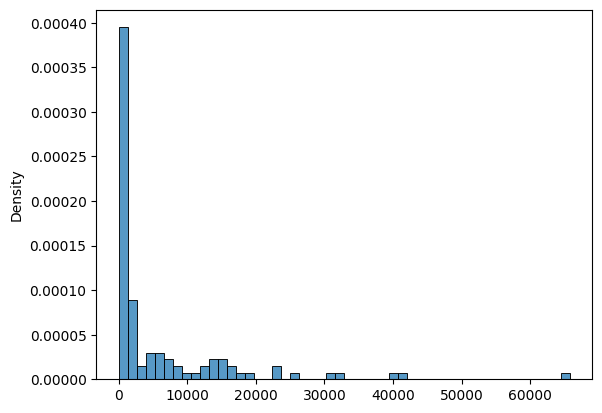

In [29]:
sns.histplot(uniqueStates[:,1], bins=50, kde=False, stat = "density")
plt.savefig(file_path + '/histogram.svg', format='svg')

#Transition graphs - before Clustering

##Network modelling

A state-transition graph in which nodes have been clustered according to the transition probabilities. Nodes correspond to the substages, and edges identify the transitions between stages. Nodes’ size is related to their in-degree. Blue, green, and red nodes are associated with substages mapping with high probability to wakefulness, NREM sleep, and REM sleep, respectively. Purple nodes correspond to substages that do not have a clear mapping to 1 of the 3 known stages (probability lower than 0.6 for any stage). Edges’ weight is related to the corresponding transition probability, and their color is related to the source node.

See [graph](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.2003663).

See [networkx examples](https://networkx.org/documentation/stable/auto_examples/index.html).

To get the transition matrix, we take into account both the previous epoch and the next one.

In [30]:
# latentStates_without_arte = latentStates.copy()
# latentStates_without_arte[np.ravel(np.where(inferredStates[:, 1] == 0))] = len(np.unique(latentStates))

In [31]:
# latentStates_bis = []
# for i in range(len(latentStates)):
#   latentStates_bis.append(latentStates_without_arte[i])
#   if i in index_end_posttrials:
#     latentStates_bis.append(len(np.unique(latentStates)))
# latentStates_bis = np.array(latentStates_bis)

In [32]:
M = transition_matrix(latentStates)

##Node colors

In [33]:
node_colors = []
pos = {}
j = 0
for i in np.unique(latentStates.astype(int)):

    idx = np.where(obsKeys[:, 1] == i )[0]
    latent_frames = obsKeys[idx, :]
    awake_pct = round((len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames))),3)
    nrem_pct = round((len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames))),3)
    rem_pct = round((len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames))),3)

    # print(awake_pct, nrem_pct, rem_pct, LS[i])
    if nrem_pct > awake_pct and nrem_pct > rem_pct: # nrem is green
        # print("nrem")
        node_colors.append("green")
        # pos[j] = [0, 0]
    elif awake_pct > nrem_pct and awake_pct > rem_pct: # awake is blue
        # print("awake")
        node_colors.append("blue")
        # pos[j] = [1, 0]
    elif rem_pct > nrem_pct and rem_pct > awake_pct: #rem is black
        # print("rem")
        node_colors.append("purple")
        # pos[j] = [1/2, math.sqrt(3)/4]
    else:
        node_colors.append("grey")
        # pos[j] = [1/2,  math.sqrt(3)/6]
    # j += 1

##Results

100%|██████████| 2000/2000 [00:19<00:00, 103.99it/s]


BarnesHut Approximation  took  2.29  seconds
Repulsion forces  took  12.70  seconds
Gravitational forces  took  0.25  seconds
Attraction forces  took  2.73  seconds
AdjustSpeedAndApplyForces step  took  0.76  seconds


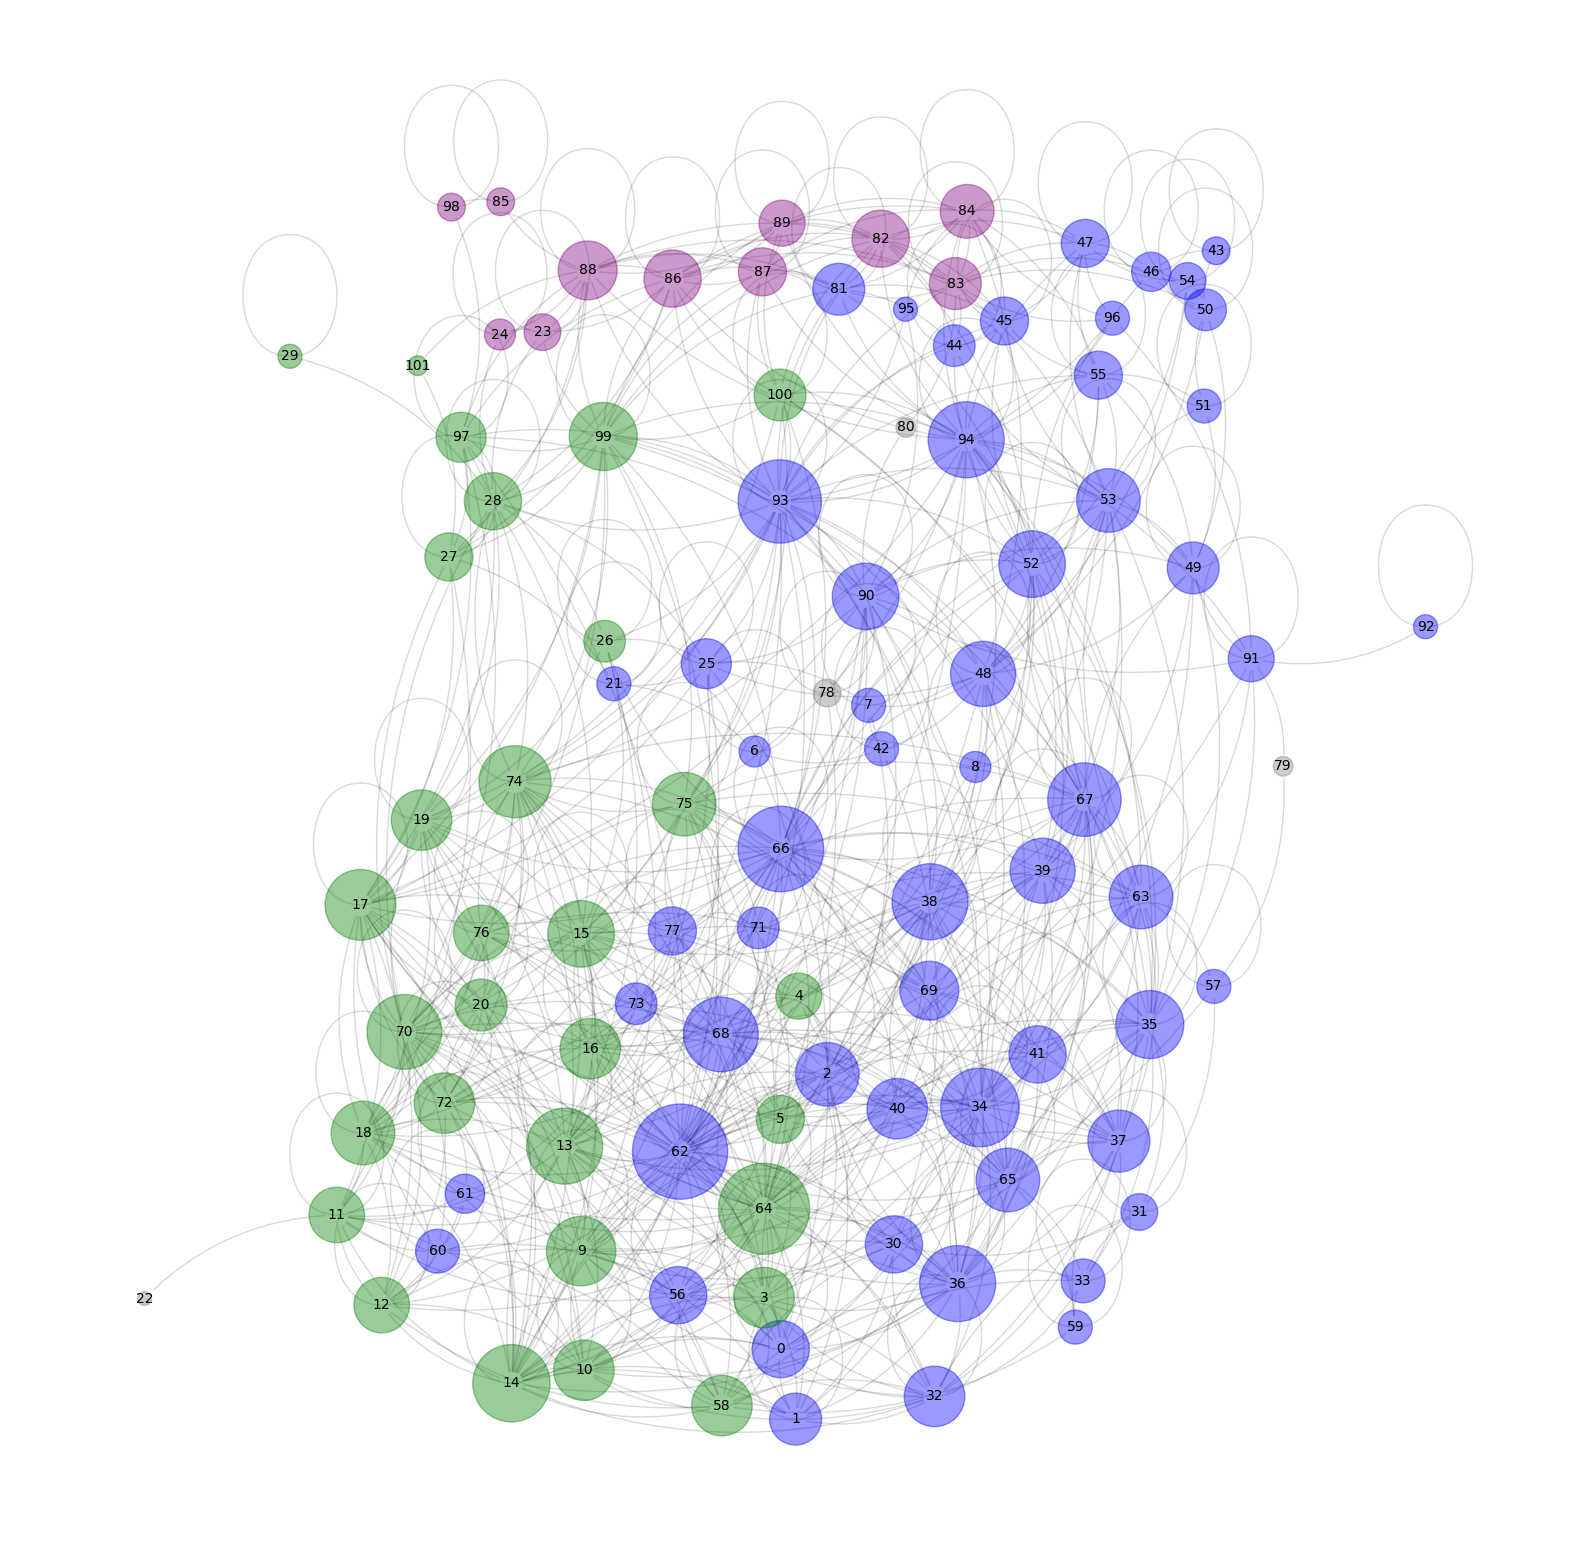

In [34]:
#@title Transition graph
plt.figure(figsize=(20, 20))

G = nx.from_numpy_array(np.array(M))
# nx.draw(G, with_labels=True)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_colors = cmap(z_score(np.log(edge_weights)))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
in_degrees = dict(G.degree())
nx.draw_networkx_nodes(G, positions,
                       node_size=[v*100 for v in in_degrees.values()],
                       node_color=node_colors,
                       alpha=0.4,)
nx.draw_networkx_edges(G, positions,
                       connectionstyle="arc3,rad=0.2",
                       edge_color="black",
                       alpha=0.15,
                       arrows=True)
nx.draw_networkx_labels(G, positions, font_size=10, font_family="sans-serif")
plt.axis('off')
plt.savefig(file_path + "/transition_graph.svg", format = "svg")
plt.show()

#Clustering

##Clusters computation

In [35]:
"""
Here, we create a new uniqueStates array but without the latent states that
are only manually scored as artefacts
"""
# uniqueStates_without_arte = []
# for i in range(len(uniqueStates)):
#   if np.any(inferredStates[np.ravel(np.where(latentStates == i)), 1] != 0):
#     uniqueStates_without_arte.append(uniqueStates[i])
#   else:
#     print(i)
# uniqueStates_without_arte = np.array(uniqueStates_without_arte)

'\nHere, we create a new uniqueStates array but without the latent states that\nare only manually scored as artefacts\n'

In [36]:
#Creating a dictionary to link the index of M lines and rows
#to the corresponding latent states
dicoM = {}
for i , el in enumerate(np.unique(latentStates[:-1])):
  dicoM[el] = i
dicoM_inv = {v: int(k) for k, v in dicoM.items()}

In [37]:
"""
Here, we iterate the clusterize function until there is not any
new clusterization done.
"""
c = 0
link_to_new_ls = {}
for u in uniqueStates[:,0]:
  link_to_new_ls[u] = u
# link_to_new_ls = np.array([u for u in uniqueStates_without_arte[:,0]])
uStates, link_to_new_ls, new_c = clusterize(uniqueStates, M, dicoM, dicoM_inv, link_to_new_ls)

print(new_c)
while new_c > 0:
  c = new_c
  latentStates_ephemeral = np.zeros_like(latentStates)
  for i, el in enumerate(latentStates):
    if int(el) not in uniqueStates[:, 0]:
      latentStates_ephemeral[i] = int(el)
    else:
      latentStates_ephemeral[i] = link_to_new_ls[int(el)]

  M_ephemeral = transition_matrix(latentStates_ephemeral)
  uStates_ephemeral = []
  for el in uStates:
    if el[1] > 0:
      uStates_ephemeral.append(el)
  uStates_ephemeral = np.array(uStates_ephemeral)
  dicoMM_ephemeral = {}
  count = 0
  for u in uStates_ephemeral[:,0]:
      dicoMM_ephemeral[u] = count
      count += 1
  uStates, link_to_new_ls, new_c = clusterize(uStates_ephemeral, M_ephemeral, dicoMM_ephemeral, dicoM_inv,  link_to_new_ls)
  print(new_c)


69
0


In [38]:
"""
We then compute the new uniqueStates that will only contain the clusters.
"""
new_uStates = []
dicoStates = {}
count = 0
for el in uStates:
  if el[1] > 0:
    new_uStates.append(el)
    dicoStates[el[0]] = count
    count += 1
new_uStates = np.array(new_uStates)

In [39]:
"""
We compute the new_inferredStates with the clusters instead of latent states.
"""
new_inferredStates = np.zeros_like(inferredStates)
for i, el in enumerate(inferredStates):
  if int(el[0]) not in link_to_new_ls.keys():
    new_inferredStates[i, 0] = int(el[0])
  else:
    new_inferredStates[i, 0] = link_to_new_ls[int(el[0])]
  new_inferredStates[i, 1] = el[1]

new_latentStates = new_inferredStates[:, 0].astype(int)

In [40]:
"""
We compute the new_obsKeys with the clusters instead of latent states.
"""

new_obsKeys = np.empty(np.shape(obsKeys))
for i, el  in enumerate(obsKeys):
  new_obsKeys[i][0] = el[0]
  if int(el[1]) in link_to_new_ls.keys():
    new_obsKeys[i][1] = link_to_new_ls[int(el[1])]
  else:
    new_obsKeys[i][1] = el[1]
  new_obsKeys[i, 2:] = el[2:]
new_obsKeys = new_obsKeys.astype(int)

In [41]:
"""
We compute the cluster dictionary.
"""
clusters = {}
for el in np.unique(new_inferredStates[:, 0]):
  cluster = []
  keys_with_value_el = [k for k, v in link_to_new_ls.items() if v == el]
  for j in  keys_with_value_el:
    cluster.append(j)
  if cluster :
    clusters[int(el)] = cluster

##Results

In [42]:
#@title Clusters
for v, k in clusters.items():
  print(v, k)

10 [9, 10, 21]
11 [11, 22]
12 [12, 61]
13 [13, 25]
14 [14]
17 [17, 27, 60, 70, 101]
18 [18, 72]
19 [19, 23, 24, 28, 29]
20 [20]
32 [1, 32, 33]
34 [0, 2, 6, 7, 30, 31, 34, 42, 43, 48, 50]
36 [3, 36]
37 [37]
38 [4, 8, 38, 44, 52, 54]
39 [35, 39]
40 [5, 40]
41 [41]
53 [45, 46, 47, 49, 51, 53, 55, 91, 92]
62 [56, 57, 62, 78, 79, 90]
64 [58, 59, 64]
66 [15, 26, 66]
67 [63, 65, 67, 69]
68 [16, 68]
74 [74, 76]
75 [71, 73, 75, 77]
82 [82]
84 [80, 83, 84, 96]
87 [87]
89 [89]
93 [81, 93, 95]
94 [94]
99 [85, 86, 88, 97, 98, 99]
100 [100]


#Confusion Matrices

Confusion Matrix
          P Wake    P NREM    P REM
T Wake  249852.0   25147.0   1571.0
T NREM   40528.0  209724.0   2199.0
T REM     4622.0    2131.0  39265.0

              Wake   NREM    REM
Accuracy     0.875  0.878  0.982
Precision    0.847  0.885  0.912
Recall       0.903  0.831  0.853
F1 score     0.874  0.857  0.882
Specificity  0.849  0.915  0.993



<Axes: >

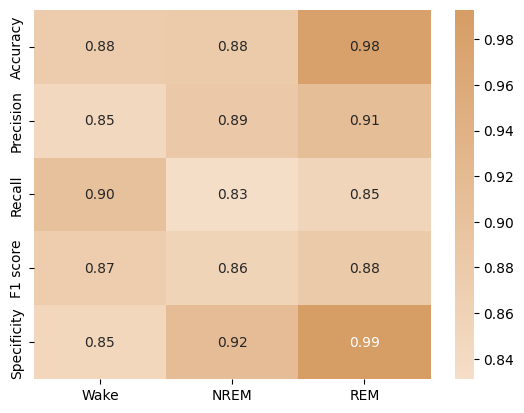

In [43]:
#@title Confusion Matrix Computation - Before Clustering
conf_matrix = np.zeros((3,3))
majority_inferred_states = np.zeros(len(uniqueStates[:, 0]))

for i in uniqueStates[:, 0]:
    idx = np.where(obsKeys[:, 1] == i )[0]
    latent_frames = obsKeys[idx, :]

    awake = len(np.where((latent_frames[:,3]==1))[0])
    nrem = len(np.where((latent_frames[:,3]==3))[0])
    rem = len(np.where((latent_frames[:,3]==5))[0])
    if awake == 0 and nrem == 0 and rem ==0:
      majority_inferred_states[i] = 0
    elif awake >= nrem and awake >= rem:
      majority_inferred_states[i] = 1
    elif nrem >= rem and nrem > awake:
      majority_inferred_states[i] = 3
    elif rem > nrem and rem > awake:
      majority_inferred_states[i] = 5

    # Update confusion matrix
    if majority_inferred_states[i] == 1:
        conf_matrix[0, 0] += awake
        conf_matrix[1, 0] += nrem
        conf_matrix[2, 0] += rem
    elif majority_inferred_states[i] == 3:
        conf_matrix[0, 1] += awake
        conf_matrix[1, 1] += nrem
        conf_matrix[2, 1] += rem
    elif majority_inferred_states[i] == 5:
        conf_matrix[0, 2] += awake
        conf_matrix[1, 2] += nrem
        conf_matrix[2, 2] += rem

def calculate_metrics(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score, specificity

accuracy, precision, recall, f1_score, specificity = calculate_metrics(conf_matrix)
for i in range(3):
  accuracy[i] = "{:.3f}".format(accuracy[i])
  precision[i] = "{:.3f}".format(precision[i])
  recall[i] = "{:.3f}".format(recall[i])
  f1_score[i] = "{:.3f}".format(f1_score[i])
  specificity[i] = "{:.3f}".format(specificity[i])

metrics = np.stack((accuracy, precision, recall, f1_score, specificity), axis=1)

conf_matrix = pd.DataFrame(conf_matrix, columns=['P Wake', 'P NREM', 'P REM'], index=['T Wake', 'T NREM', 'T REM'])
metrics = pd.DataFrame(metrics.T, columns=['Wake', 'NREM', 'REM'], index=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Specificity'])

print('Confusion Matrix')
print(conf_matrix)
print('')
print(metrics)
print()

colors = ["#F5DEC8", "#d69d65"]
cmap_confusion_matrix_all_WNR = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)

sns.heatmap(metrics, cmap=cmap_confusion_matrix_all_WNR, annot=True, fmt=".2f")

Confusion Matrix
          P Wake    P NREM    P REM
T Wake  243043.0   32141.0   1386.0
T NREM   39251.0  212183.0   1017.0
T REM     4613.0    5112.0  36293.0

              Wake   NREM    REM
Accuracy     0.865  0.865  0.979
Precision    0.847  0.851  0.938
Recall       0.879  0.840  0.789
F1 score     0.863  0.846  0.857
Specificity  0.853  0.885  0.995



<Axes: >

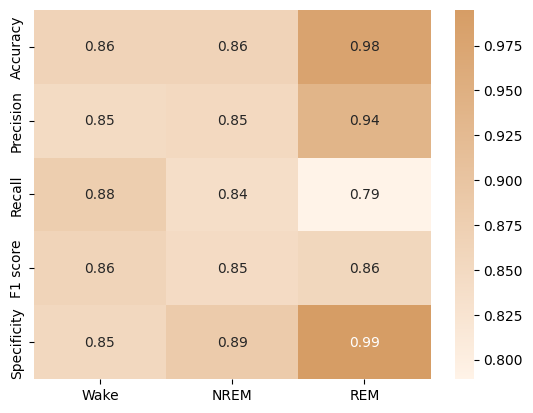

In [44]:
#@title Confusion Matrix Computation - After Clustering
conf_matrix = np.zeros((3,3))
majority_inferred_states_cluster = np.zeros(len(uniqueStates[:, 0]))

for i in uniqueStates[:, 0]:
    idx = np.where(new_obsKeys[:, 1] == i )[0]
    latent_frames = new_obsKeys[idx, :]

    awake = len(np.where((latent_frames[:,3]==1))[0])
    nrem = len(np.where((latent_frames[:,3]==3))[0])
    rem = len(np.where((latent_frames[:,3]==5))[0])
    if awake == 0 and nrem == 0 and rem ==0:
      majority_inferred_states_cluster[i] = 0
    elif awake >= nrem and awake >= rem:
      majority_inferred_states_cluster[i] = 1
    elif nrem >= rem and nrem > awake:
      majority_inferred_states_cluster[i] = 3
    elif rem > nrem and rem > awake:
      majority_inferred_states_cluster[i] = 5
    # Update confusion matrix
    if majority_inferred_states_cluster[i] == 1:
        conf_matrix[0, 0] += awake
        conf_matrix[1, 0] += nrem
        conf_matrix[2, 0] += rem
    elif majority_inferred_states_cluster[i] == 3:
        conf_matrix[0, 1] += awake
        conf_matrix[1, 1] += nrem
        conf_matrix[2, 1] += rem
    elif majority_inferred_states_cluster[i] == 5:
        conf_matrix[0, 2] += awake
        conf_matrix[1, 2] += nrem
        conf_matrix[2, 2] += rem

def calculate_metrics(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score, specificity

accuracy, precision, recall, f1_score, specificity = calculate_metrics(conf_matrix)
for i in range(3):
  accuracy[i] = "{:.3f}".format(accuracy[i])
  precision[i] = "{:.3f}".format(precision[i])
  recall[i] = "{:.3f}".format(recall[i])
  f1_score[i] = "{:.3f}".format(f1_score[i])
  specificity[i] = "{:.3f}".format(specificity[i])

metrics = np.stack((accuracy, precision, recall, f1_score, specificity), axis=1)

new_conf_matrix = pd.DataFrame(conf_matrix, columns=['P Wake', 'P NREM', 'P REM'], index=['T Wake', 'T NREM', 'T REM'])
new_metrics = pd.DataFrame(metrics.T, columns=['Wake', 'NREM', 'REM'], index=['Accuracy', 'Precision', 'Recall', 'F1 score', 'Specificity'])

print('Confusion Matrix')
print(new_conf_matrix)
print('')
print(new_metrics)
print()

colors = ["#fff3e8", "#d69d65"]
cmap_confusion_matrix = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)

sns.heatmap(new_metrics, cmap=cmap_confusion_matrix, annot=True, fmt=".2f")

#Histograms by state

Text(0, 0.5, 'Number of latent states')

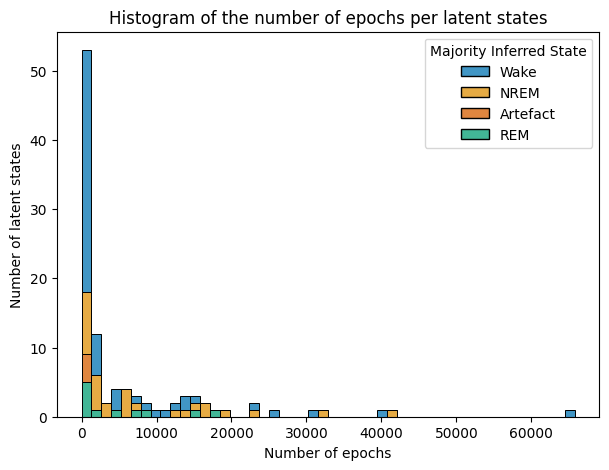

In [45]:
#@title Histogram by majority inferred state
nameStates = {0 : "Artefact", 1 : "Wake", 3 : "NREM", 4 : "TS", 5 : "REM"}
majority_inferred_state_names = [nameStates[i] for i in majority_inferred_states]

# Define your custom palette
custom_palette = {
    "Artefact": sns.color_palette("colorblind", 5)[3],
    "Wake": sns.color_palette("colorblind", 5)[0],
    "NREM": sns.color_palette("colorblind", 5)[1],
    "TS": sns.color_palette("colorblind", 5)[4],
    "REM": sns.color_palette("colorblind", 5)[2]
}

# Create the DataFrame
df = pd.DataFrame({
    "Number of epochs": uniqueStates[:,1],
    "Majority Inferred State": majority_inferred_state_names
})

# Plot with custom palette
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=df, ax=ax, stat="count", multiple="stack",
             x="Number of epochs", bins=50,
             palette=custom_palette, hue="Majority Inferred State",
             element="bars", legend=True)
ax.set_title("Histogram of the number of epochs per latent states")
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Number of latent states")


Text(0, 0.5, 'Number of latent states')

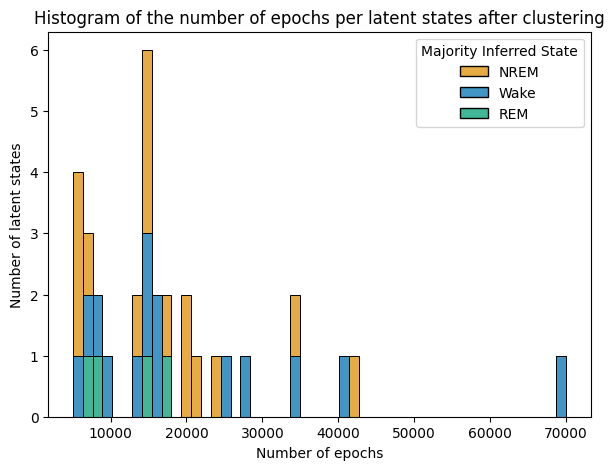

In [46]:
#@title Histogram by majority inferred state - Cluster
nameStates = {0 : "Artefact", 1 : "Wake", 3 : "NREM", 4 : "TS", 5 : "REM"}
majority_inferred_state_names_cluster = [nameStates[i] for i in majority_inferred_states_cluster]
majority_inferred_state_names_cluster = [majority_inferred_state_names_cluster[i] for i in new_uStates[:, 0]]
# Define your custom palette
custom_palette = {
    "Artefact": sns.color_palette("colorblind", 5)[3],
    "Wake": sns.color_palette("colorblind", 5)[0],
    "NREM": sns.color_palette("colorblind", 5)[1],
    "TS": sns.color_palette("colorblind", 5)[4],
    "REM": sns.color_palette("colorblind", 5)[2]
}

# Create the DataFrame
df = pd.DataFrame({
    "Number of epochs": new_uStates[:,1],
    "Majority Inferred State": majority_inferred_state_names_cluster
})

# Plot with custom palette
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=df, ax=ax, stat="count", multiple="stack",
             x="Number of epochs", bins=50,
             palette=custom_palette, hue="Majority Inferred State",
             element="bars", legend=True)
ax.set_title("Histogram of the number of epochs per latent states after clustering")
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Number of latent states")


#Boxplots

In [47]:
#@title Cluster indexes

for k, v in clusters.items():
  if v :
    print(k, end = " - ")

10 - 11 - 12 - 13 - 14 - 17 - 18 - 19 - 20 - 32 - 34 - 36 - 37 - 38 - 39 - 40 - 41 - 53 - 62 - 64 - 66 - 67 - 68 - 74 - 75 - 82 - 84 - 87 - 89 - 93 - 94 - 99 - 100 - 

10 : [9, 10, 21]


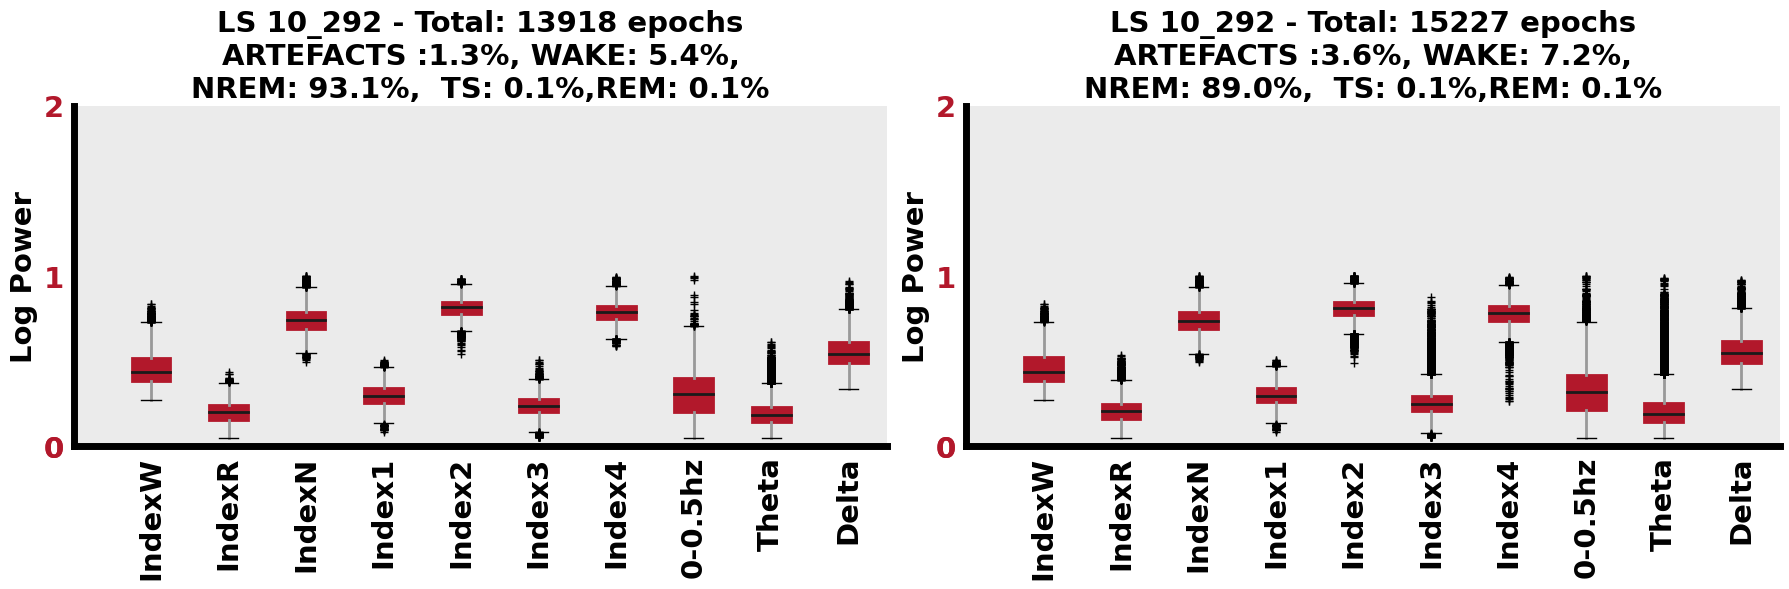

11 : [11, 22]


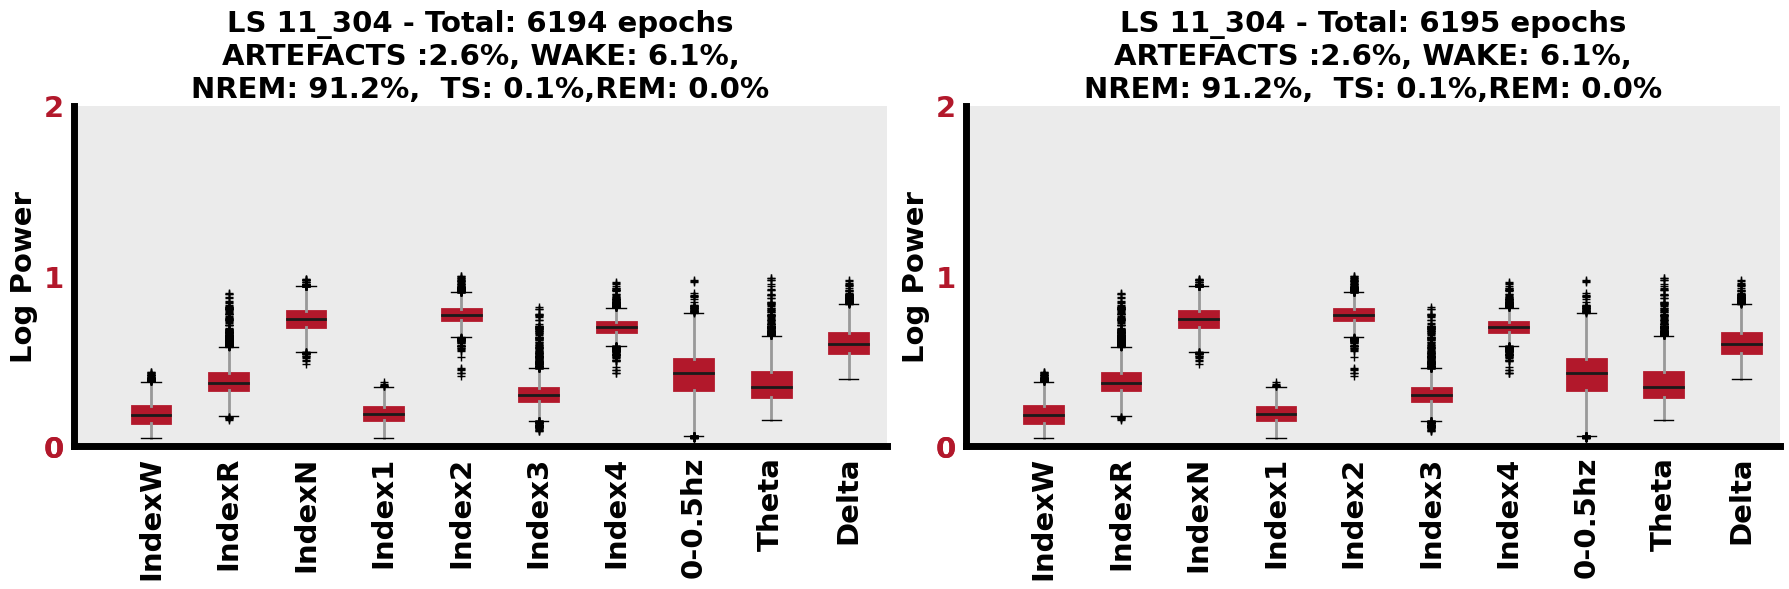

12 : [12, 61]


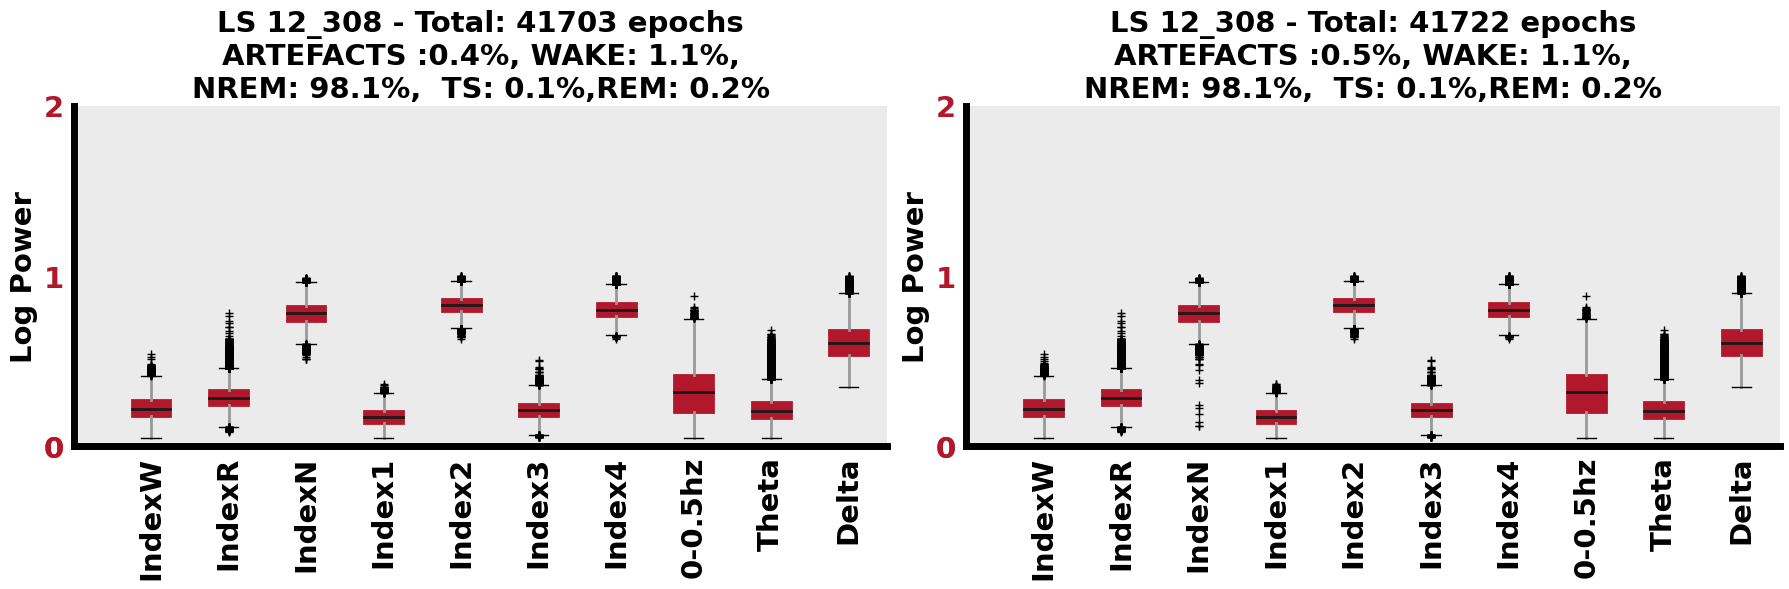

13 : [13, 25]


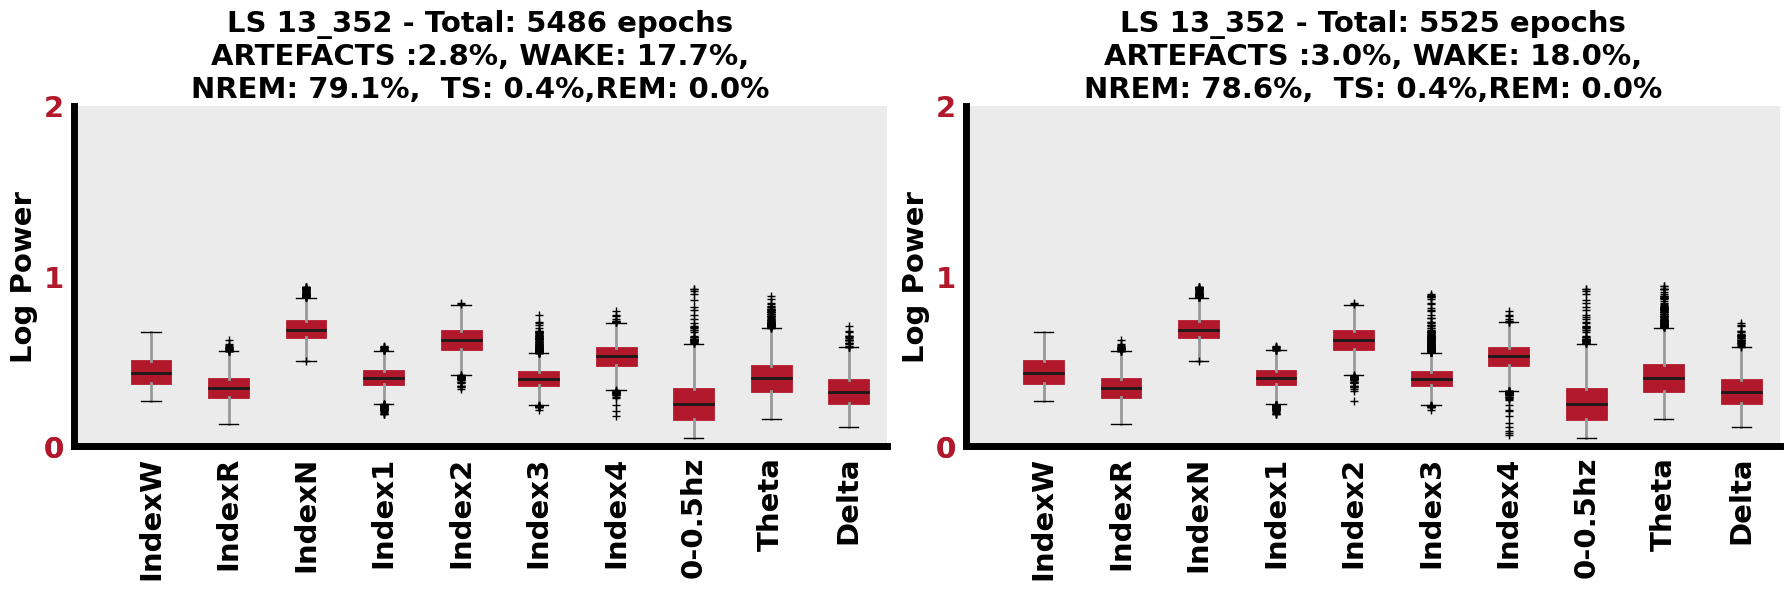

14 : [14]


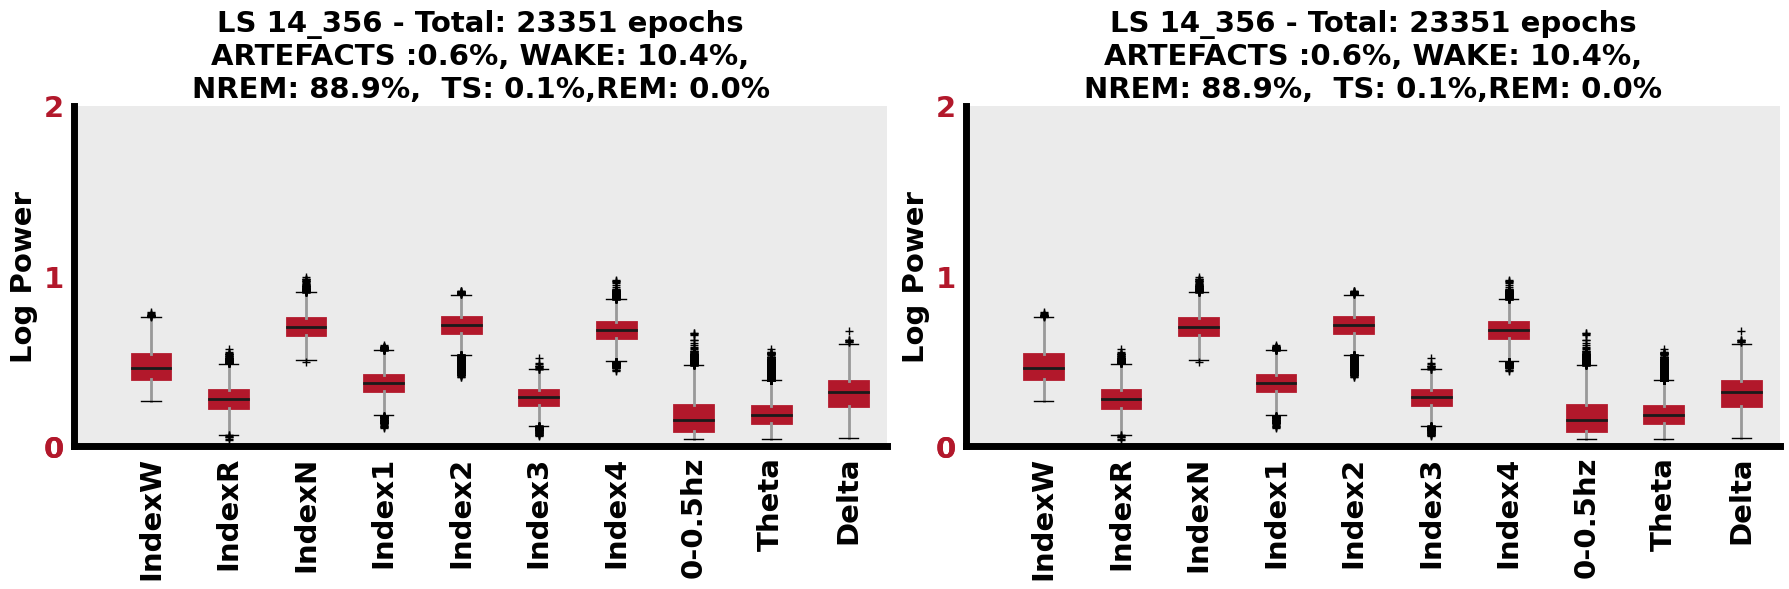

17 : [17, 27, 60, 70, 101]


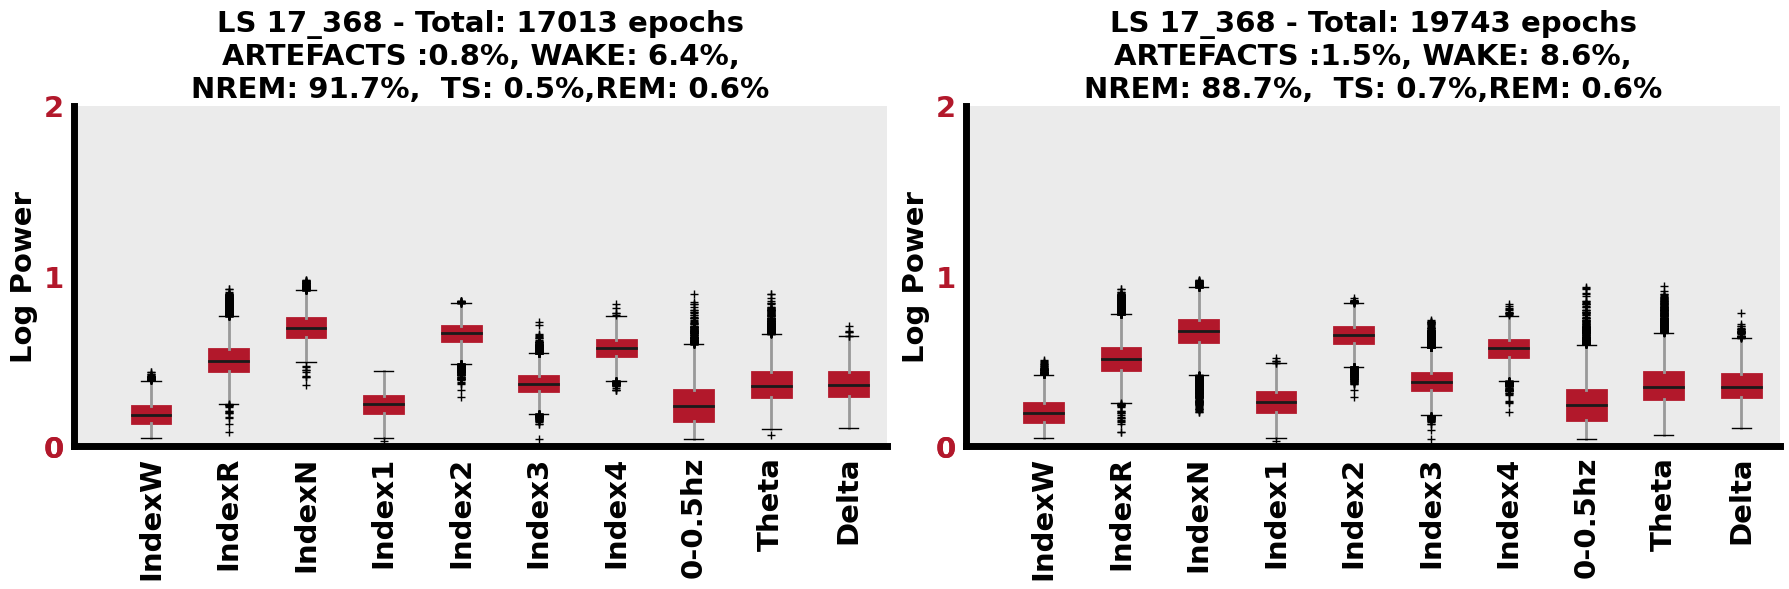

18 : [18, 72]


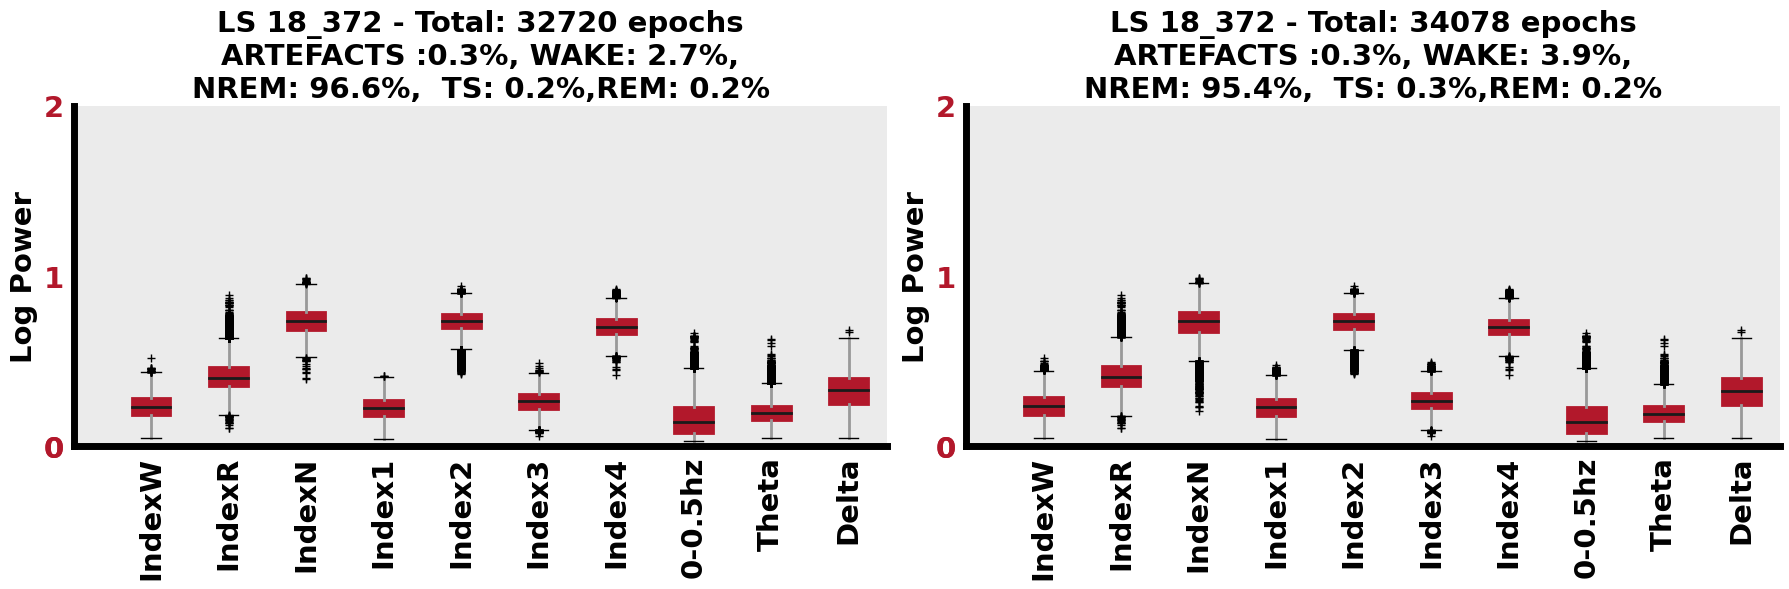

19 : [19, 23, 24, 28, 29]


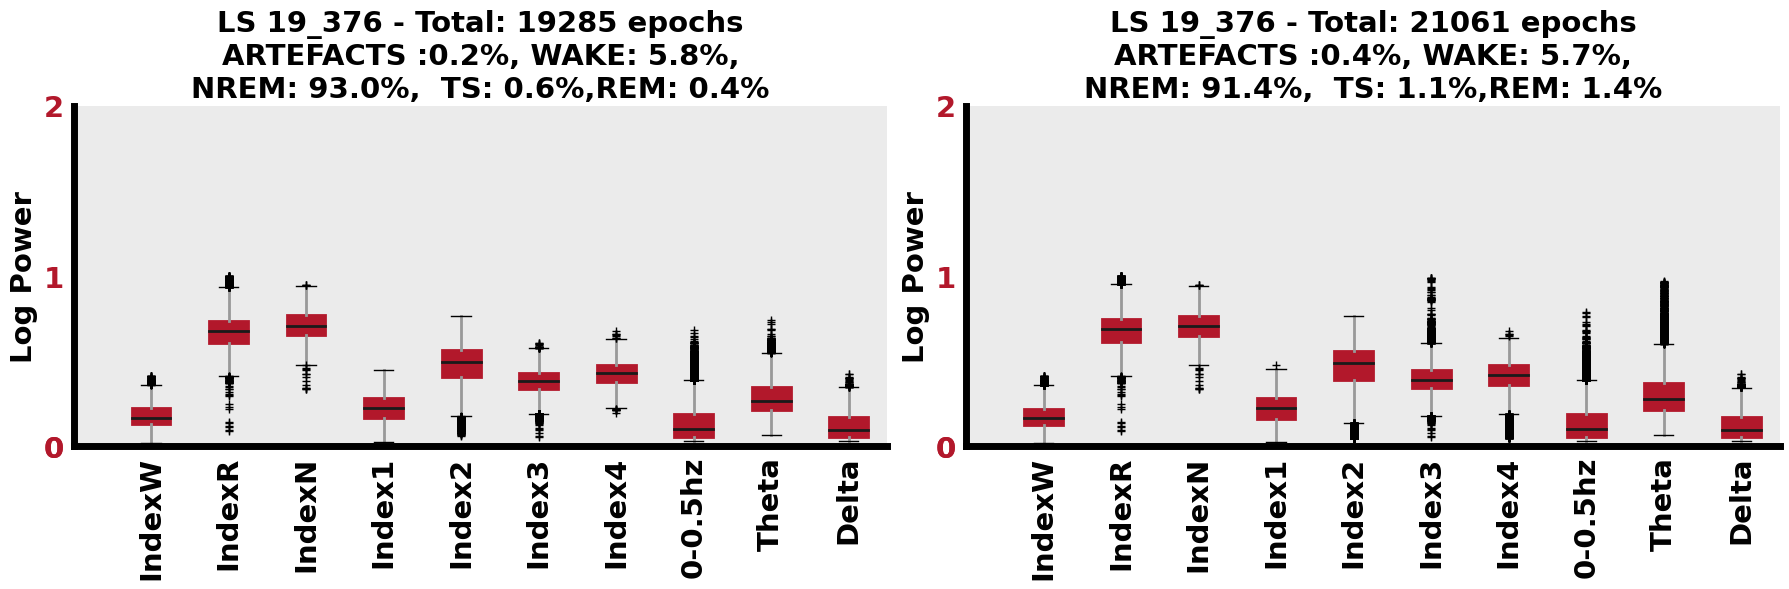

20 : [20]


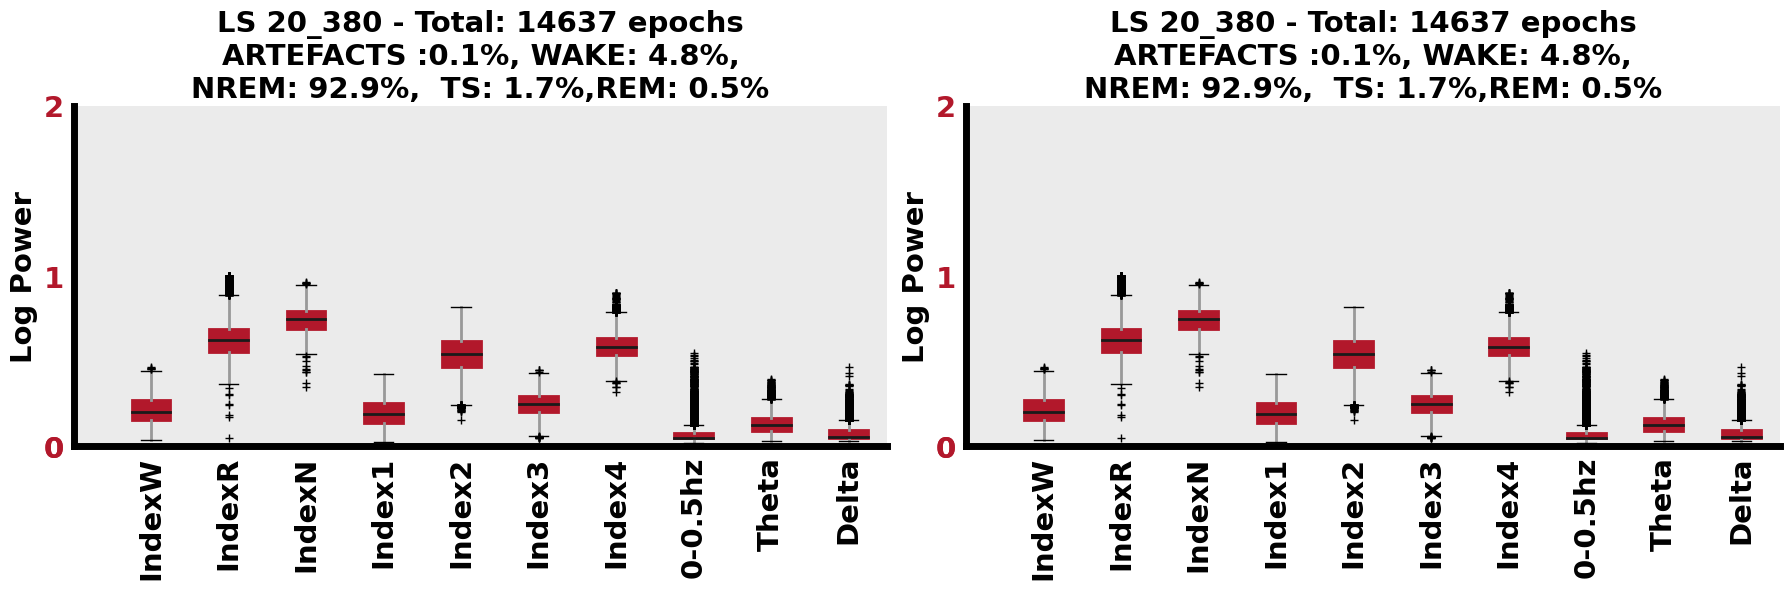

32 : [1, 32, 33]


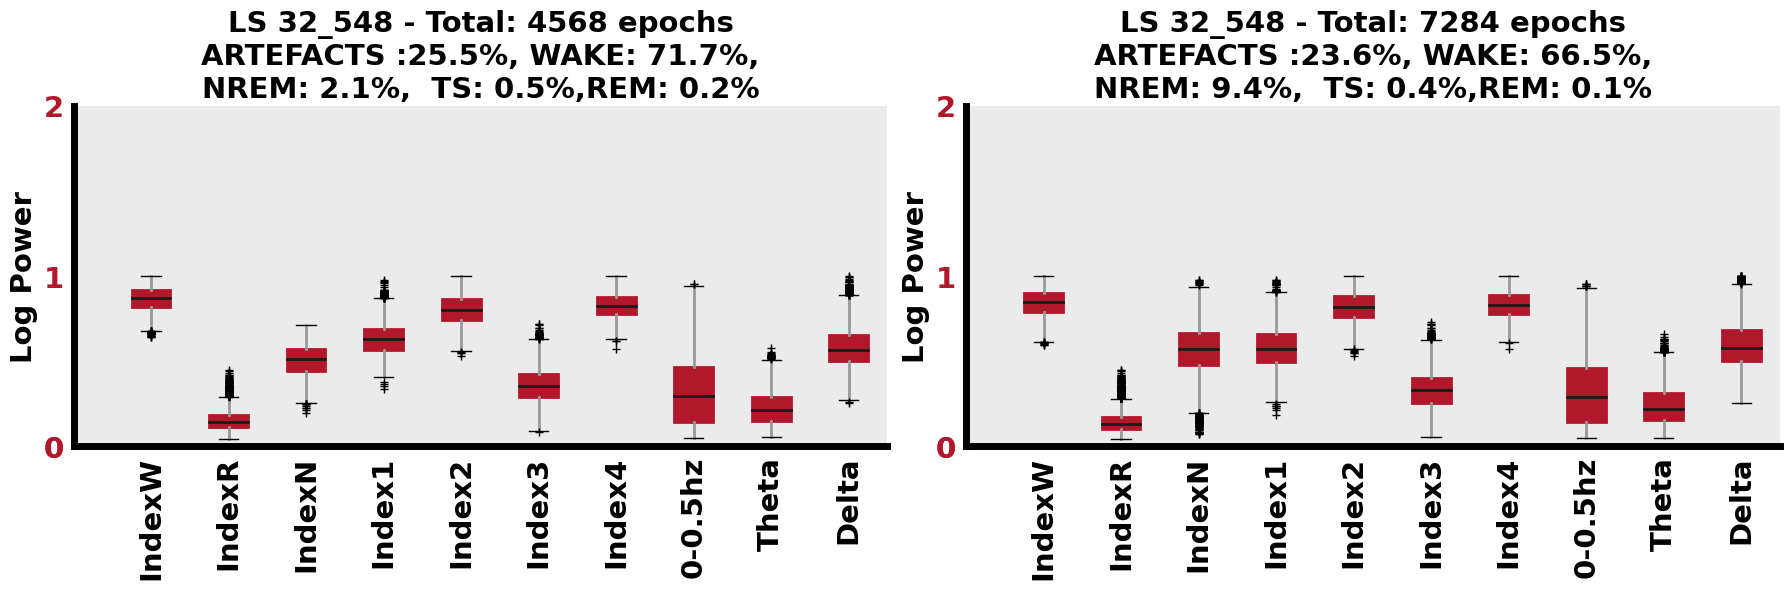

34 : [0, 2, 6, 7, 30, 31, 34, 42, 43, 48, 50]


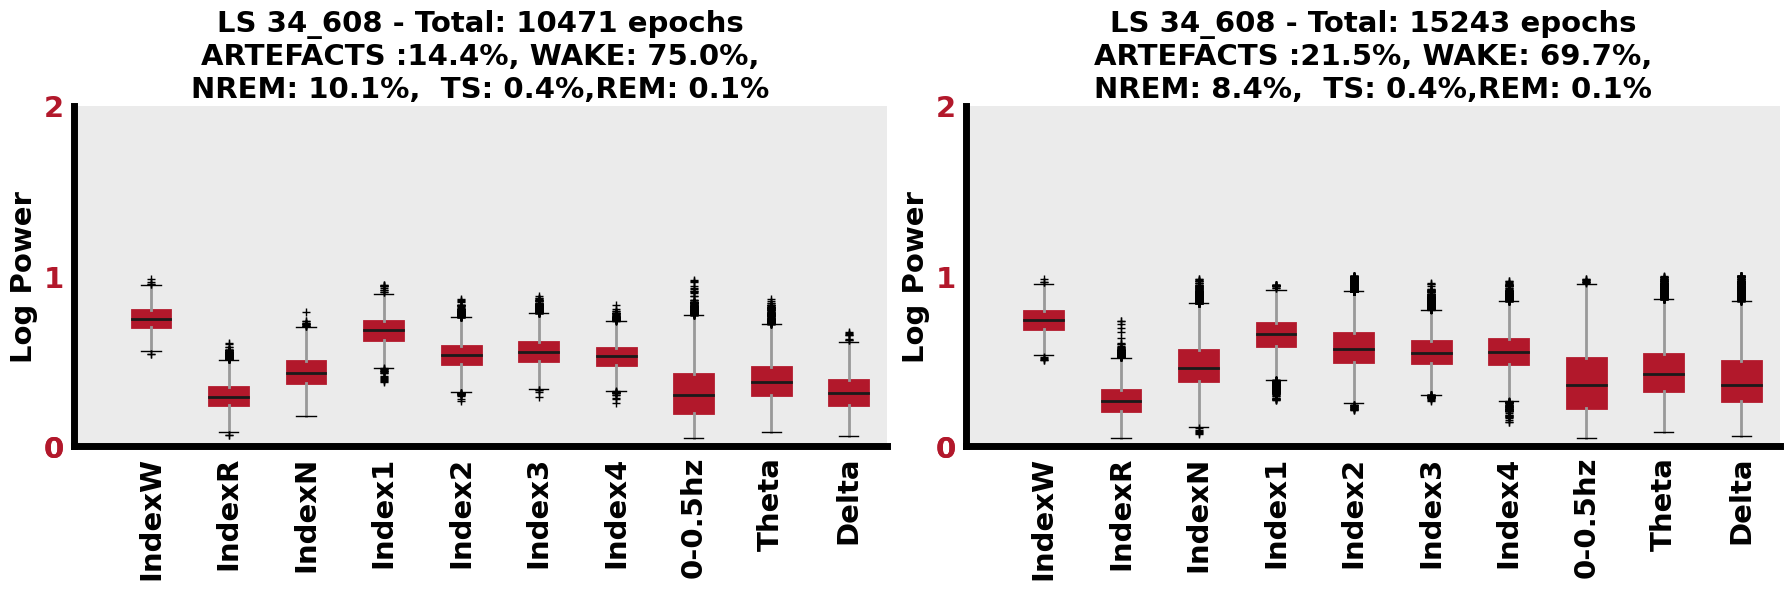

36 : [3, 36]


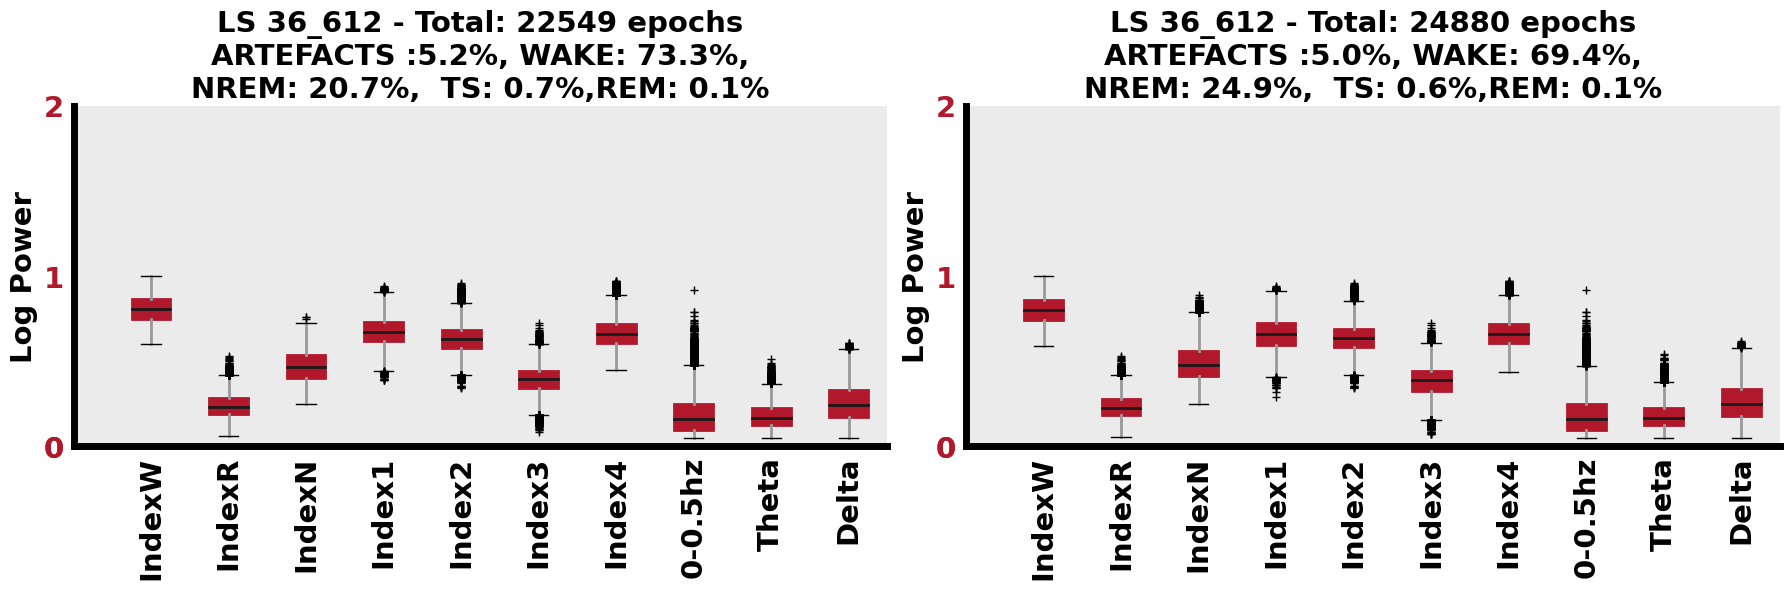

37 : [37]


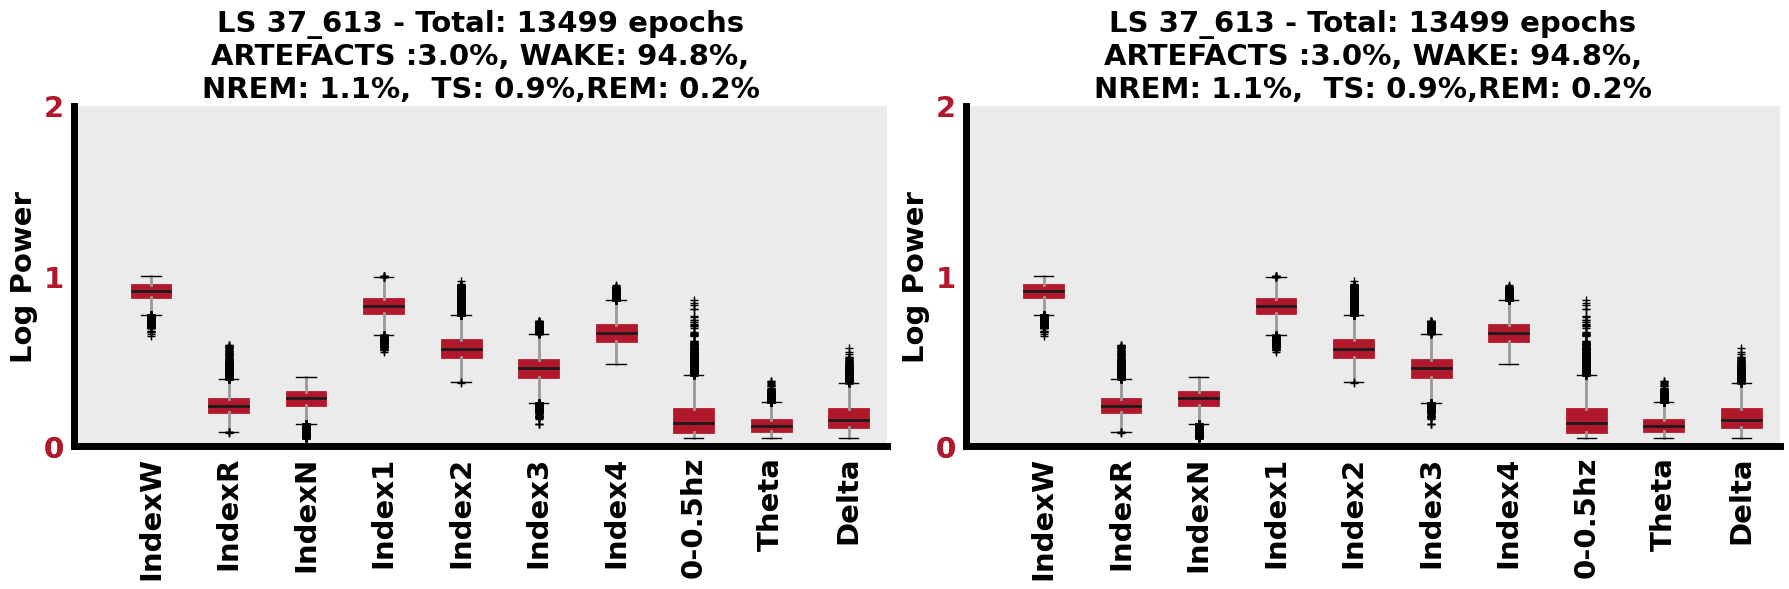

38 : [4, 8, 38, 44, 52, 54]


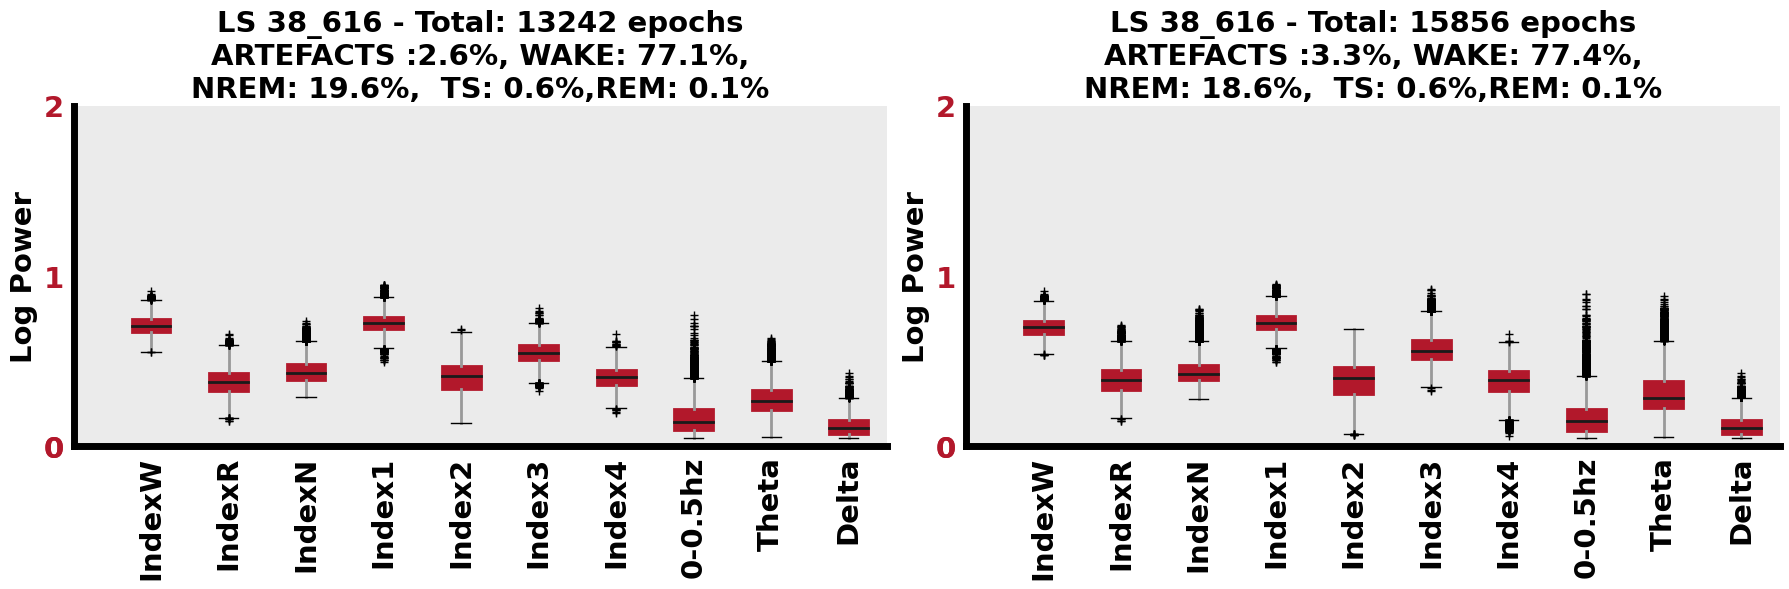

39 : [35, 39]


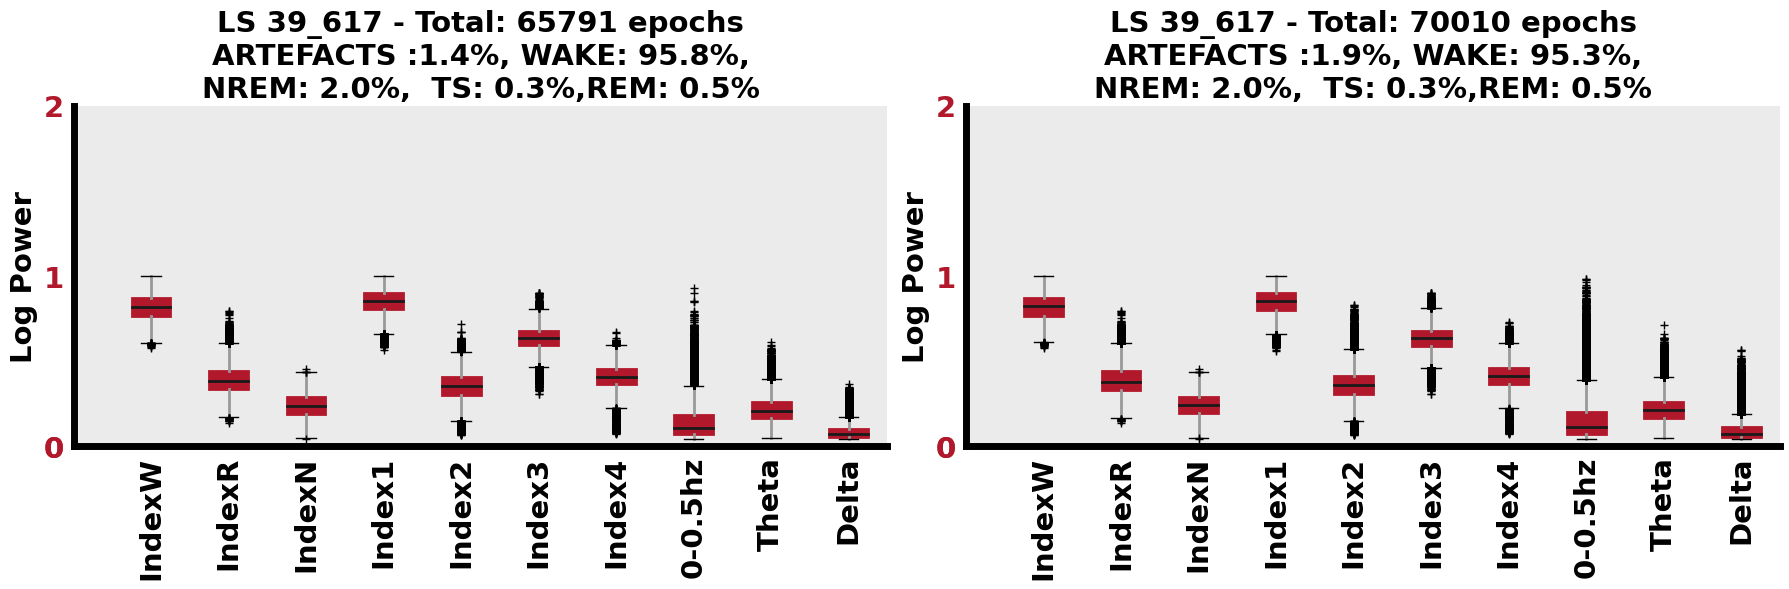

40 : [5, 40]


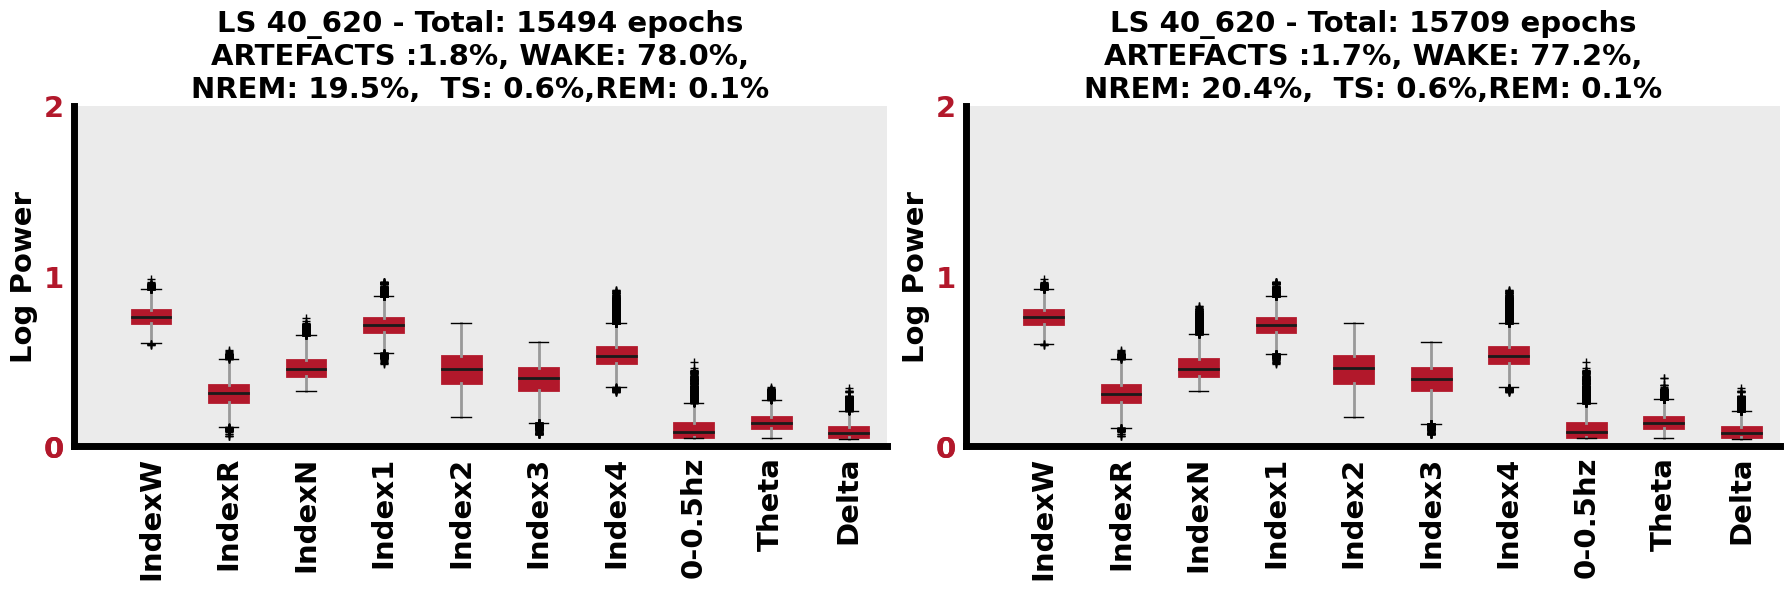

41 : [41]


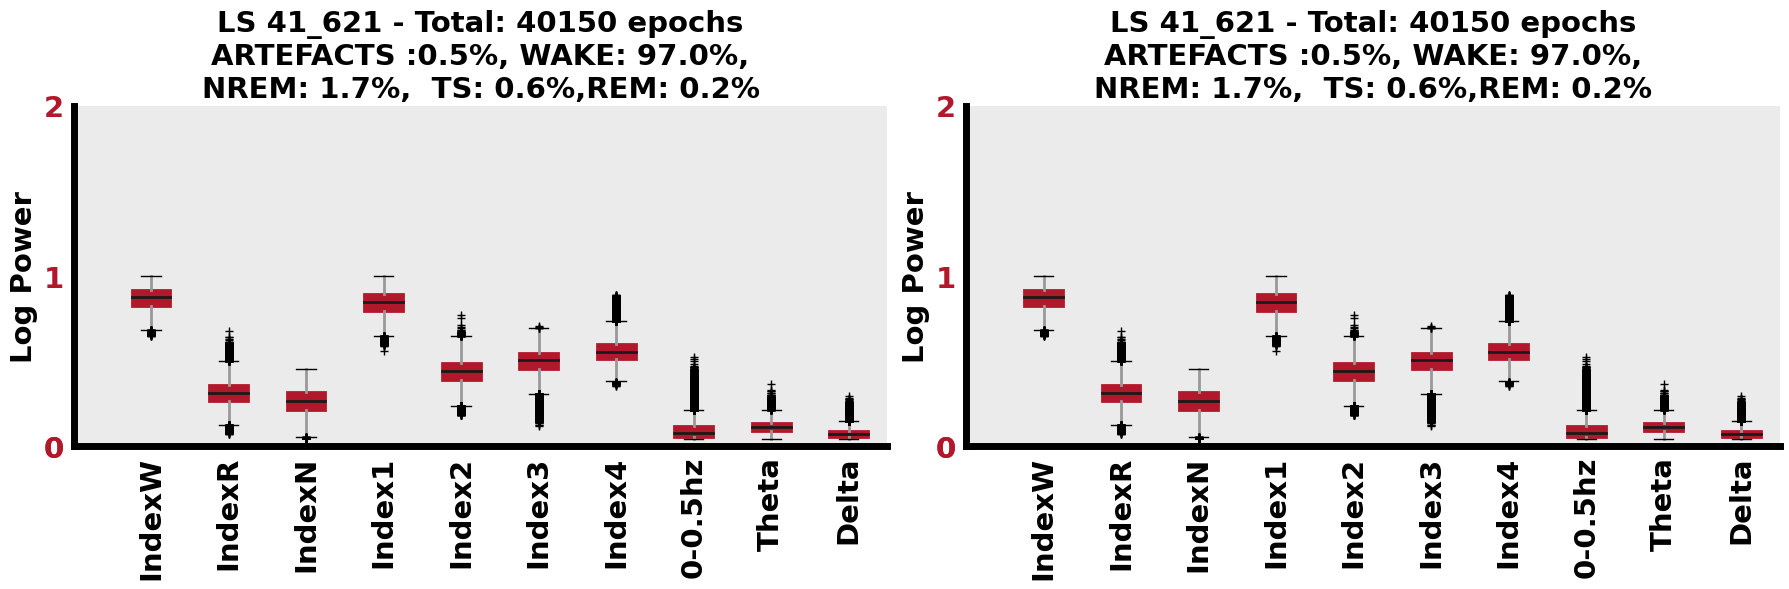

53 : [45, 46, 47, 49, 51, 53, 55, 91, 92]


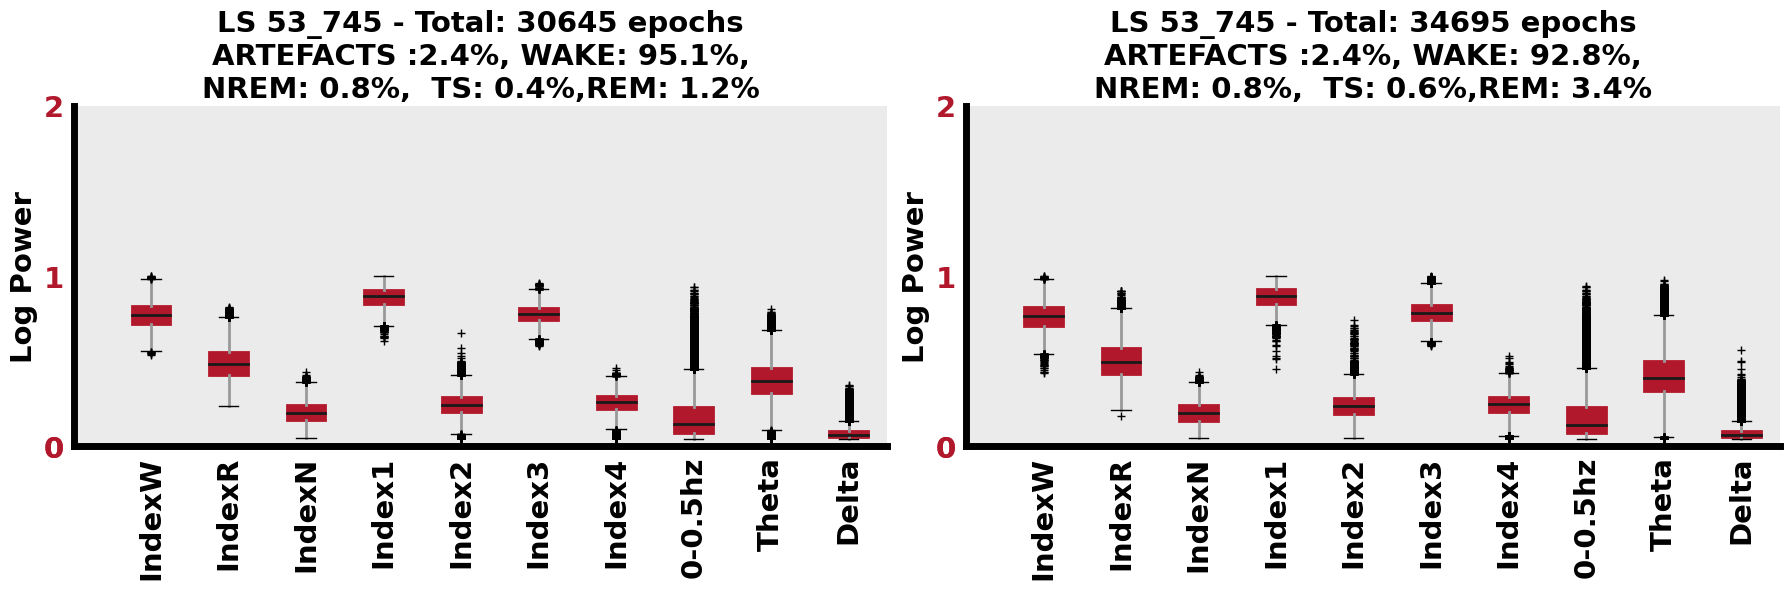

62 : [56, 57, 62, 78, 79, 90]


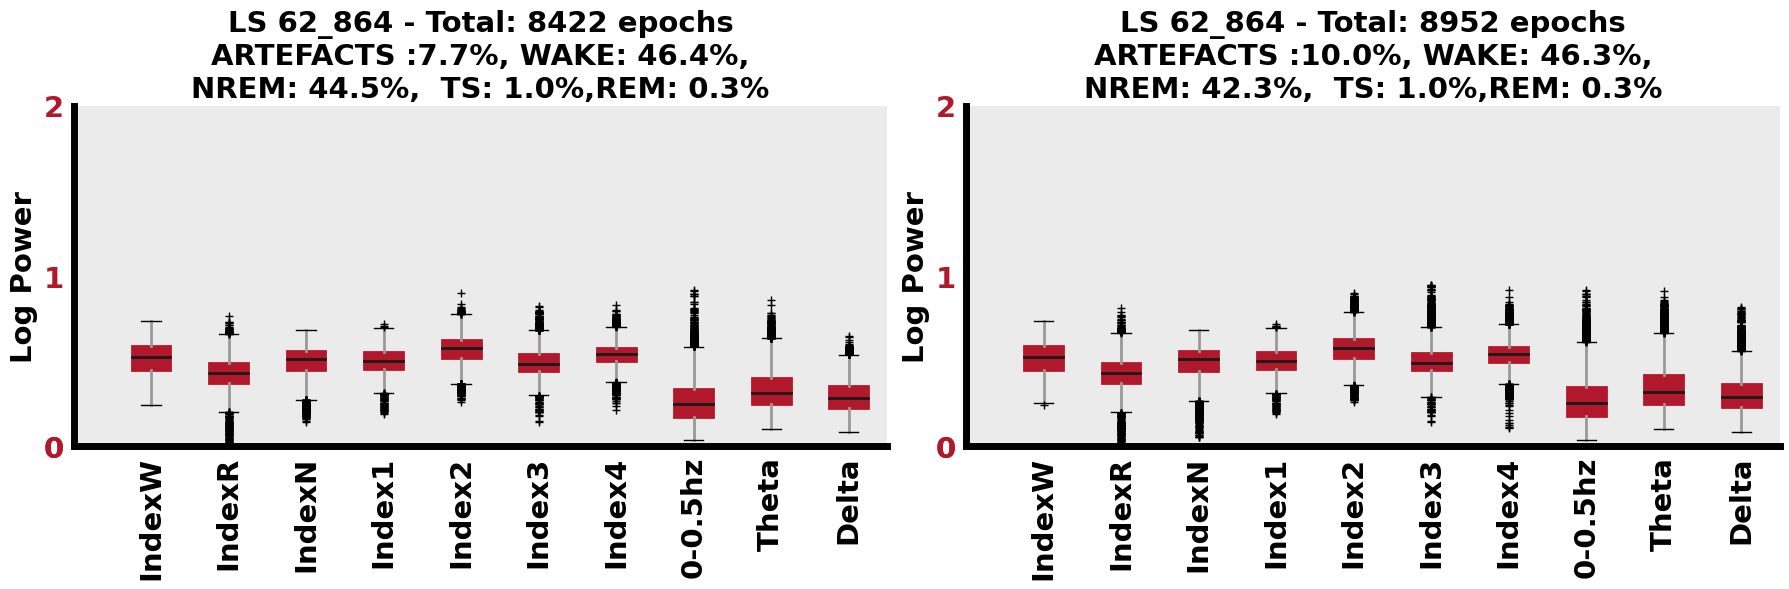

64 : [58, 59, 64]


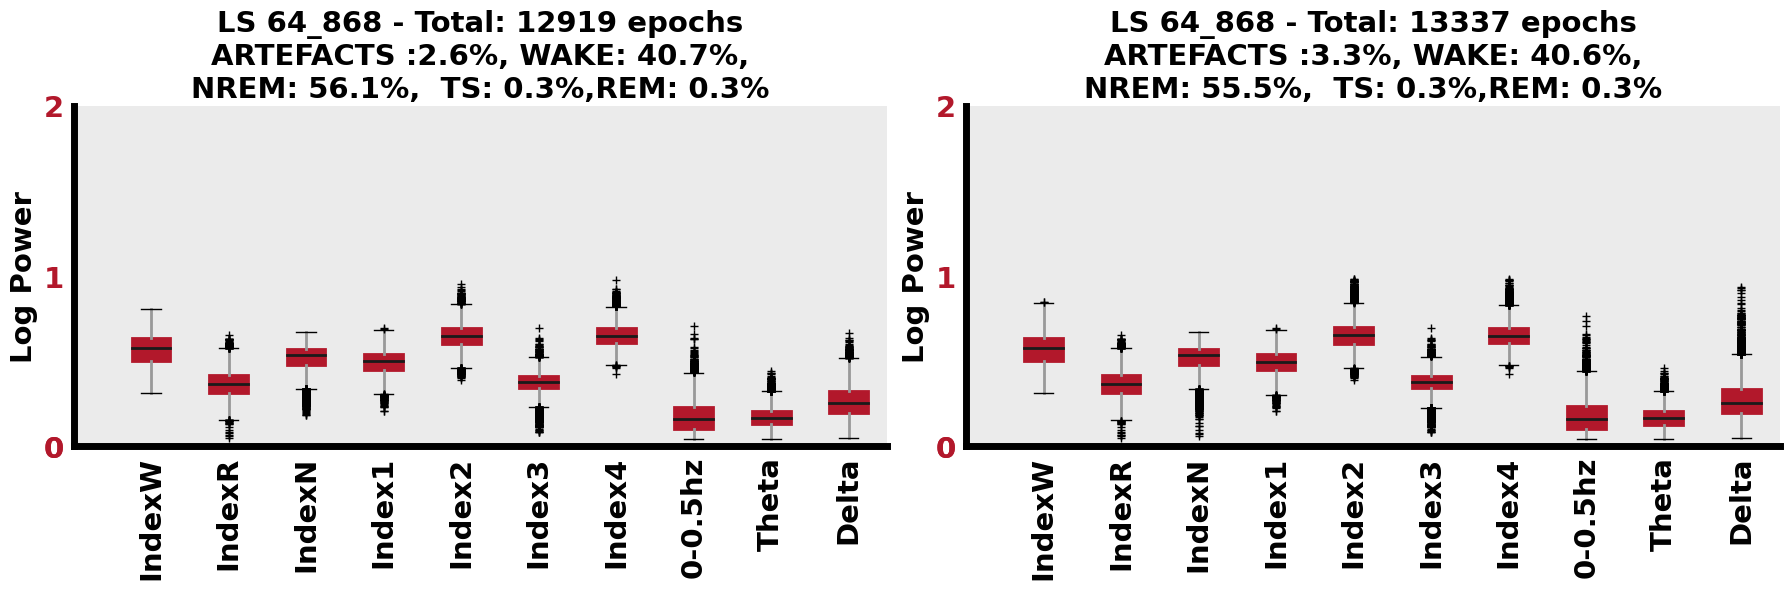

66 : [15, 26, 66]


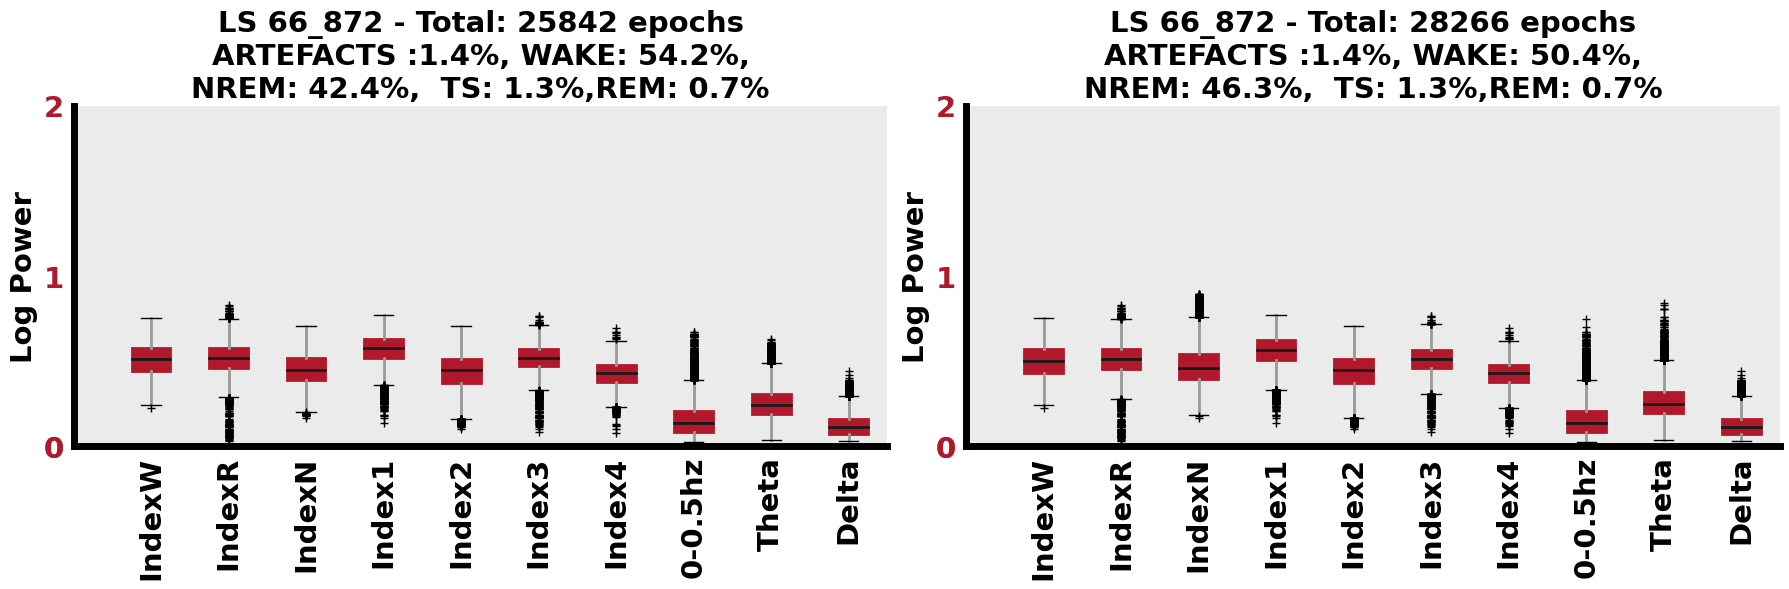

67 : [63, 65, 67, 69]


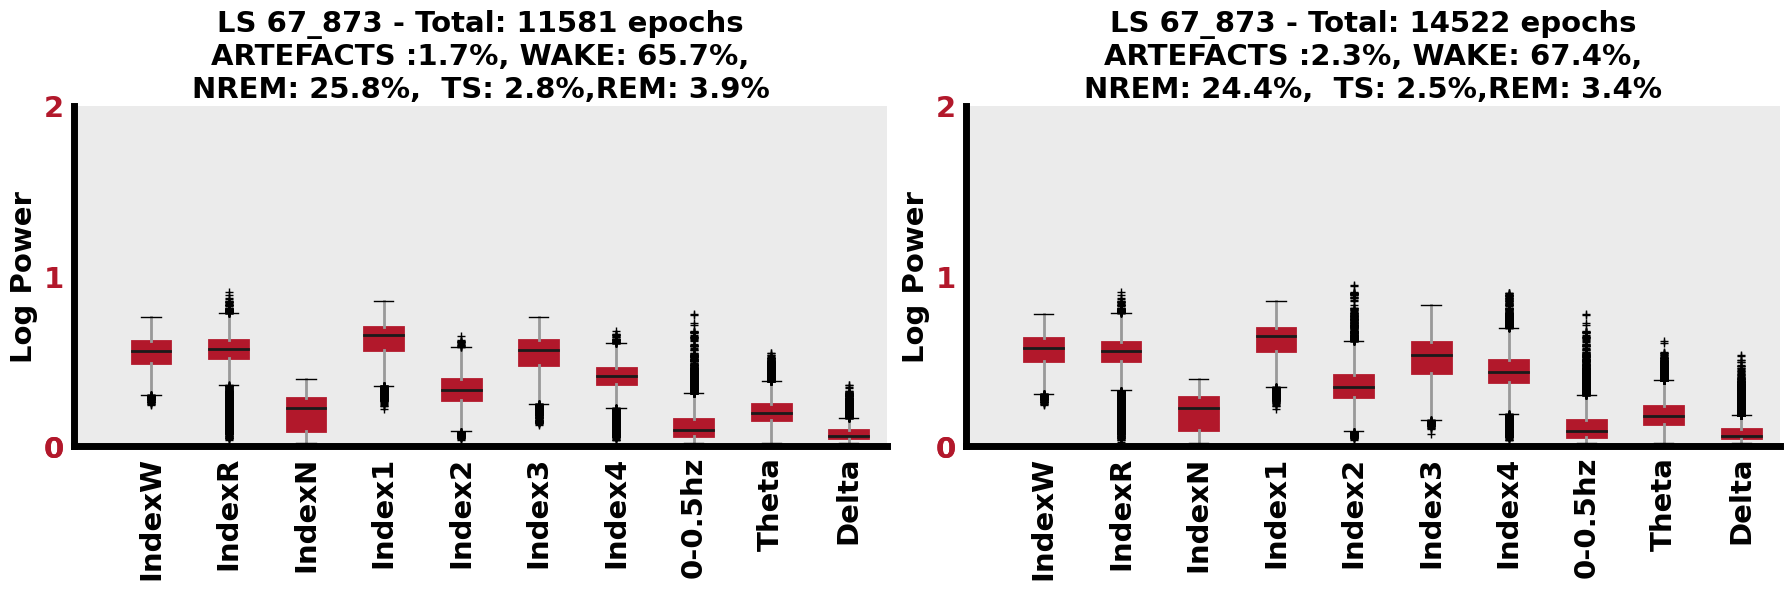

68 : [16, 68]


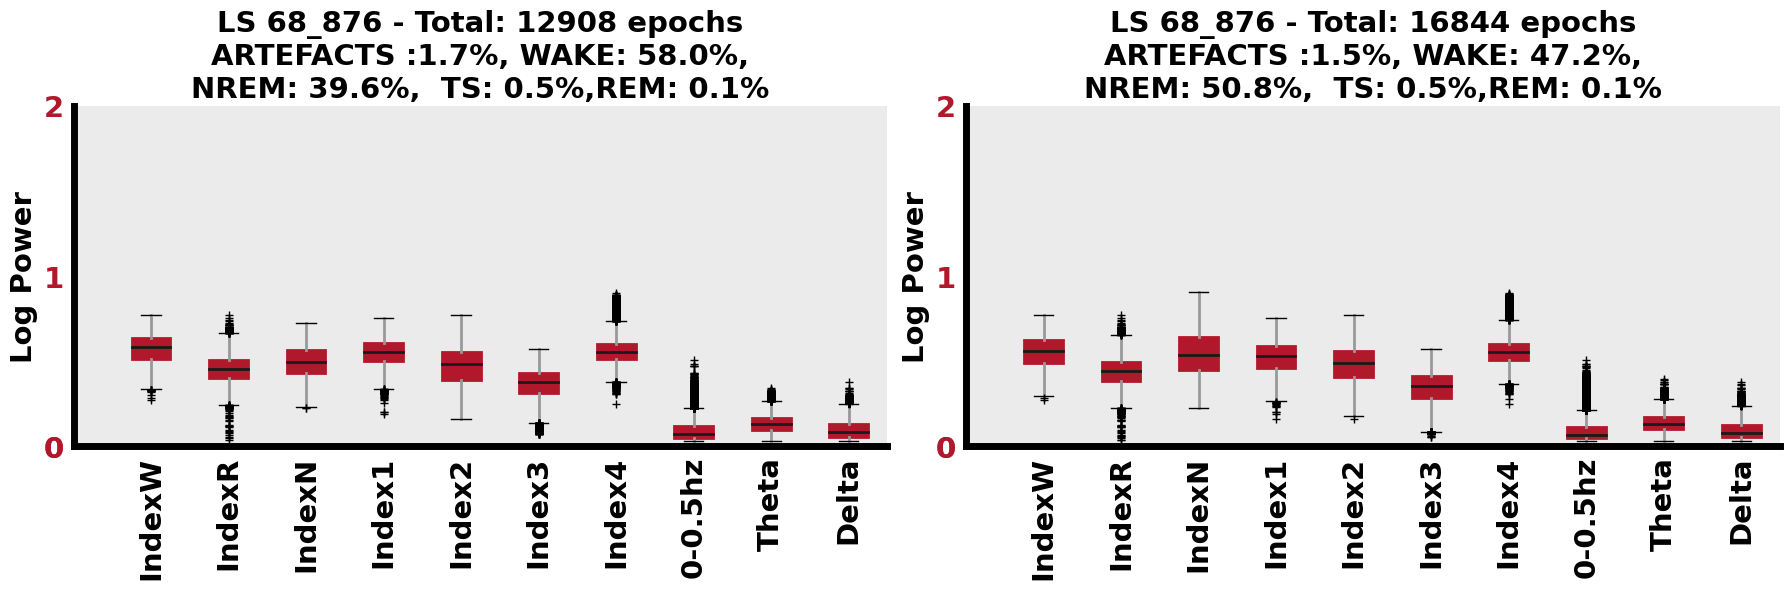

74 : [74, 76]


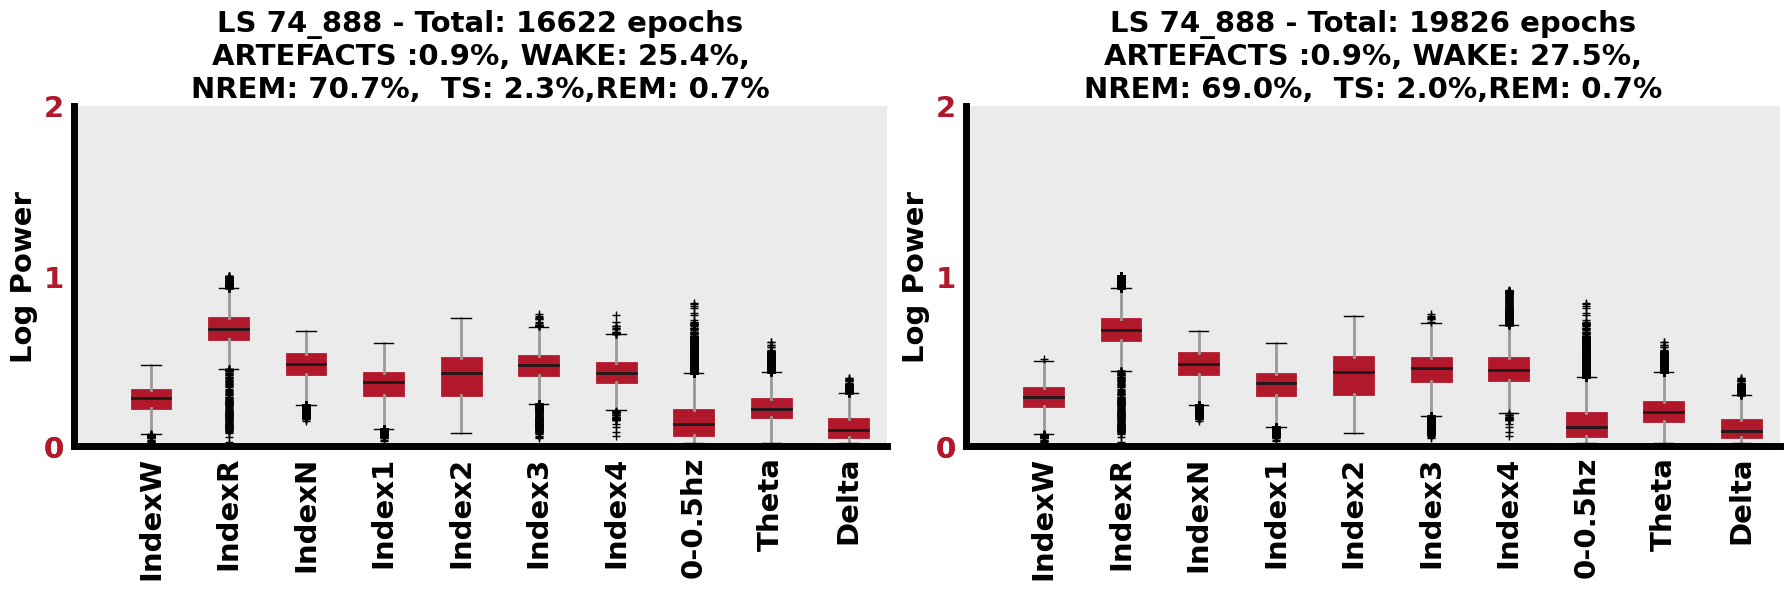

75 : [71, 73, 75, 77]


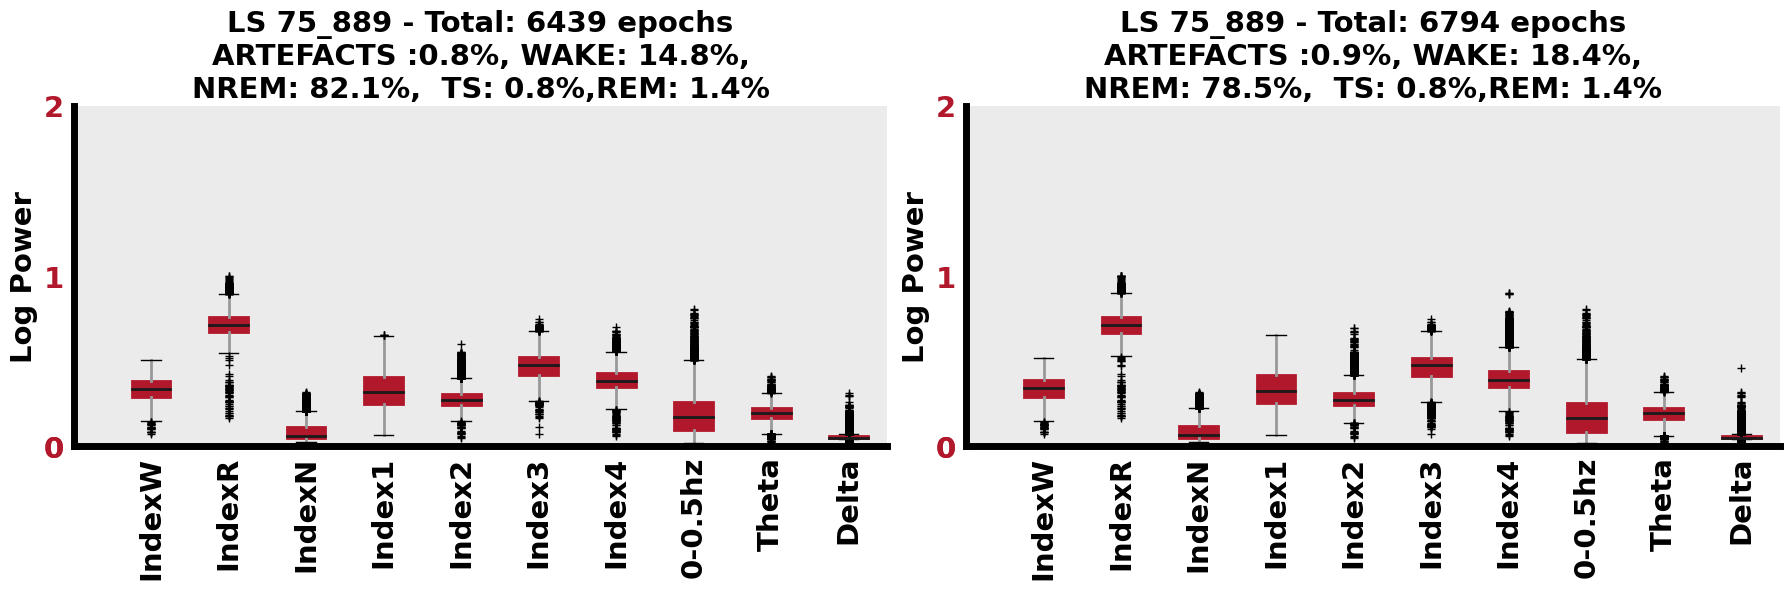

82 : [82]


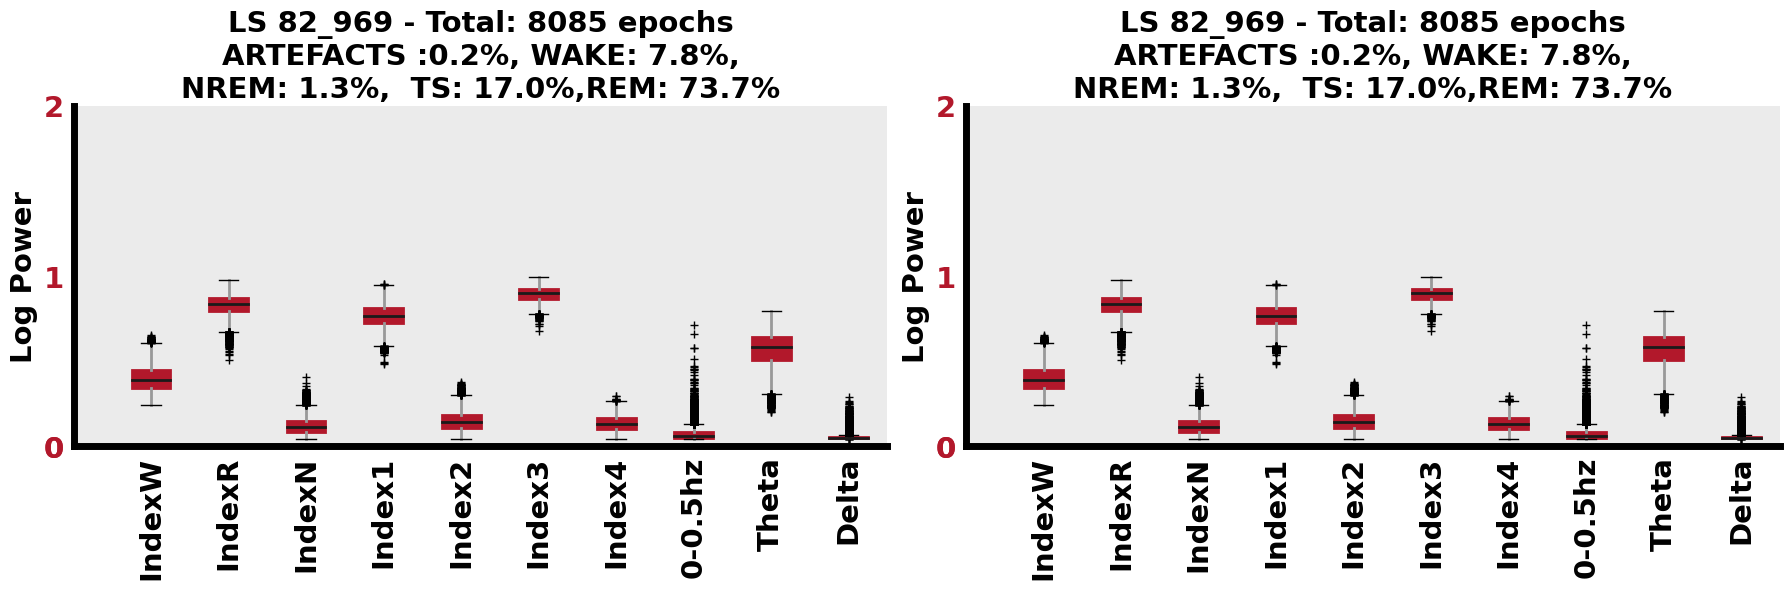

84 : [80, 83, 84, 96]


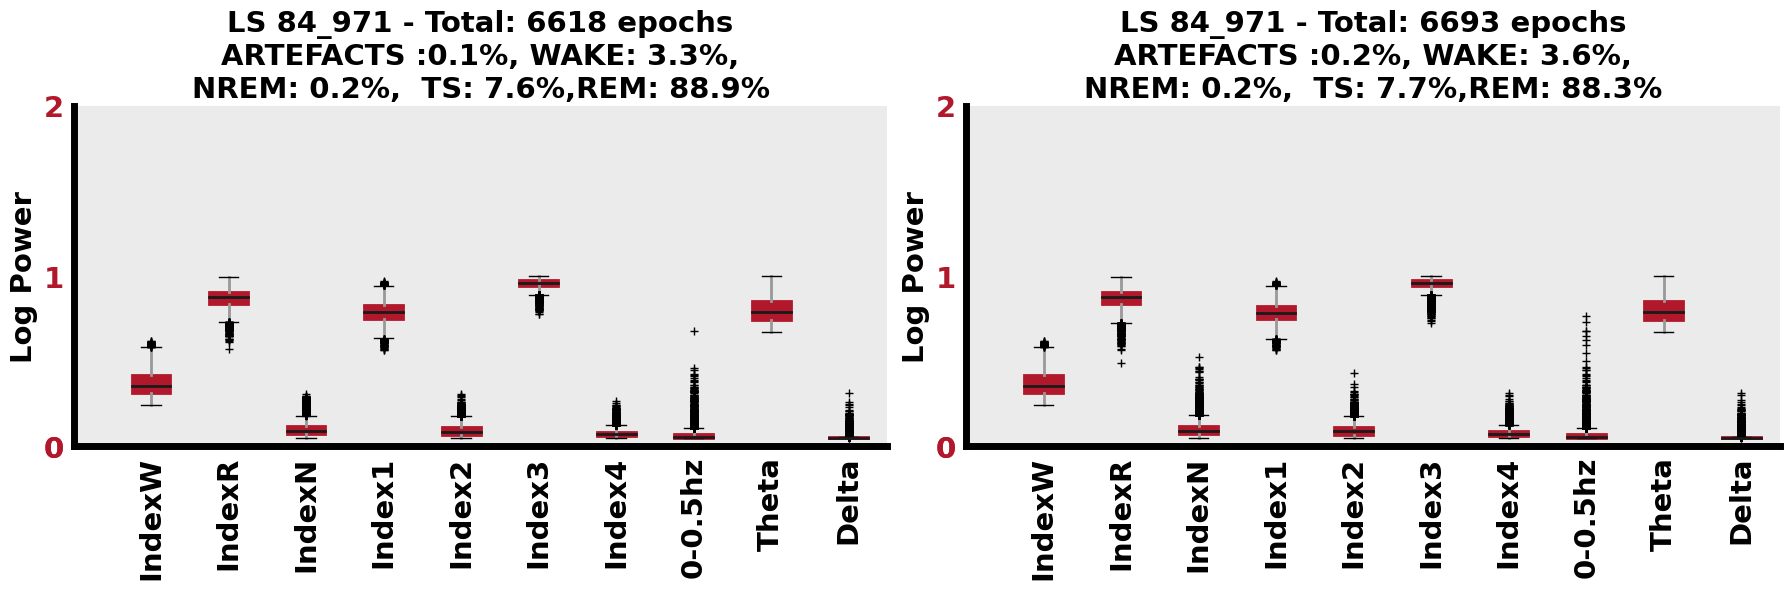

87 : [87]


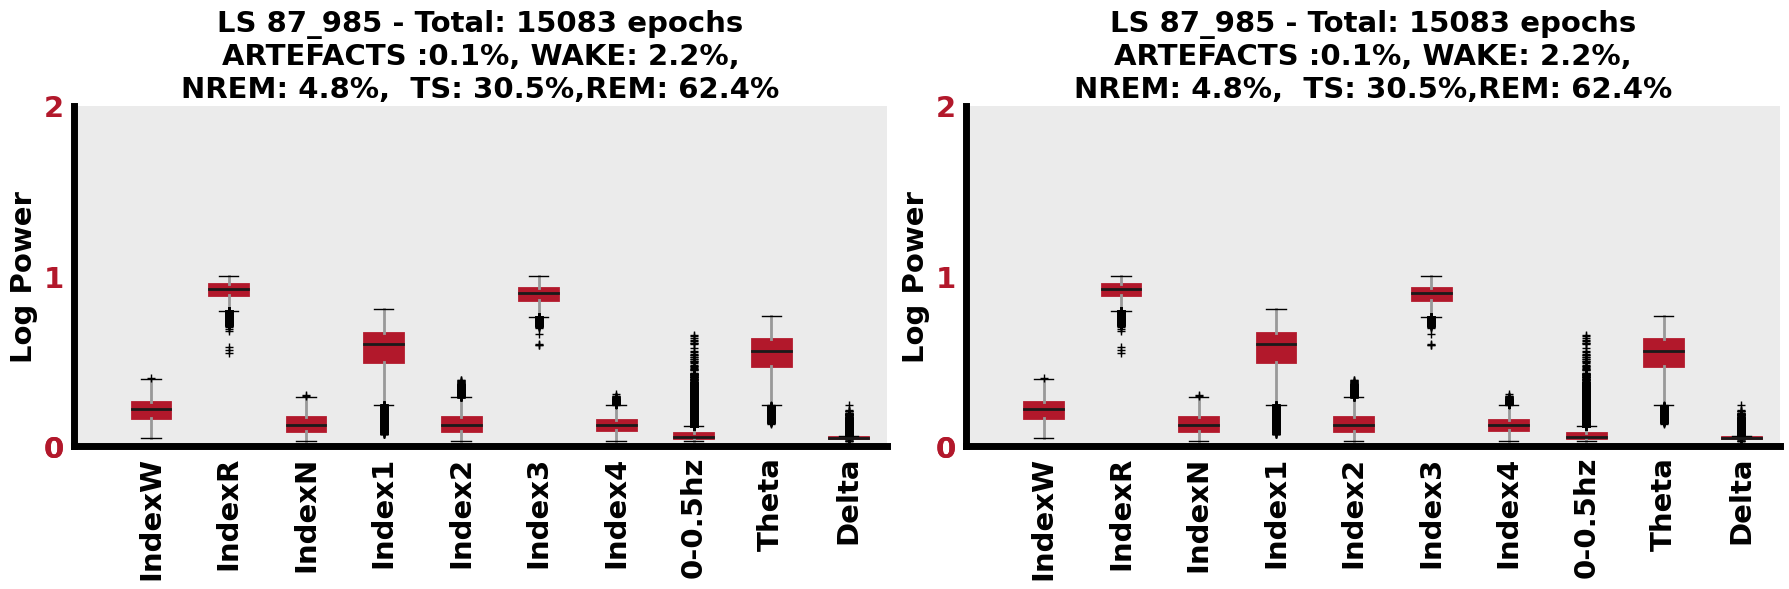

89 : [89]


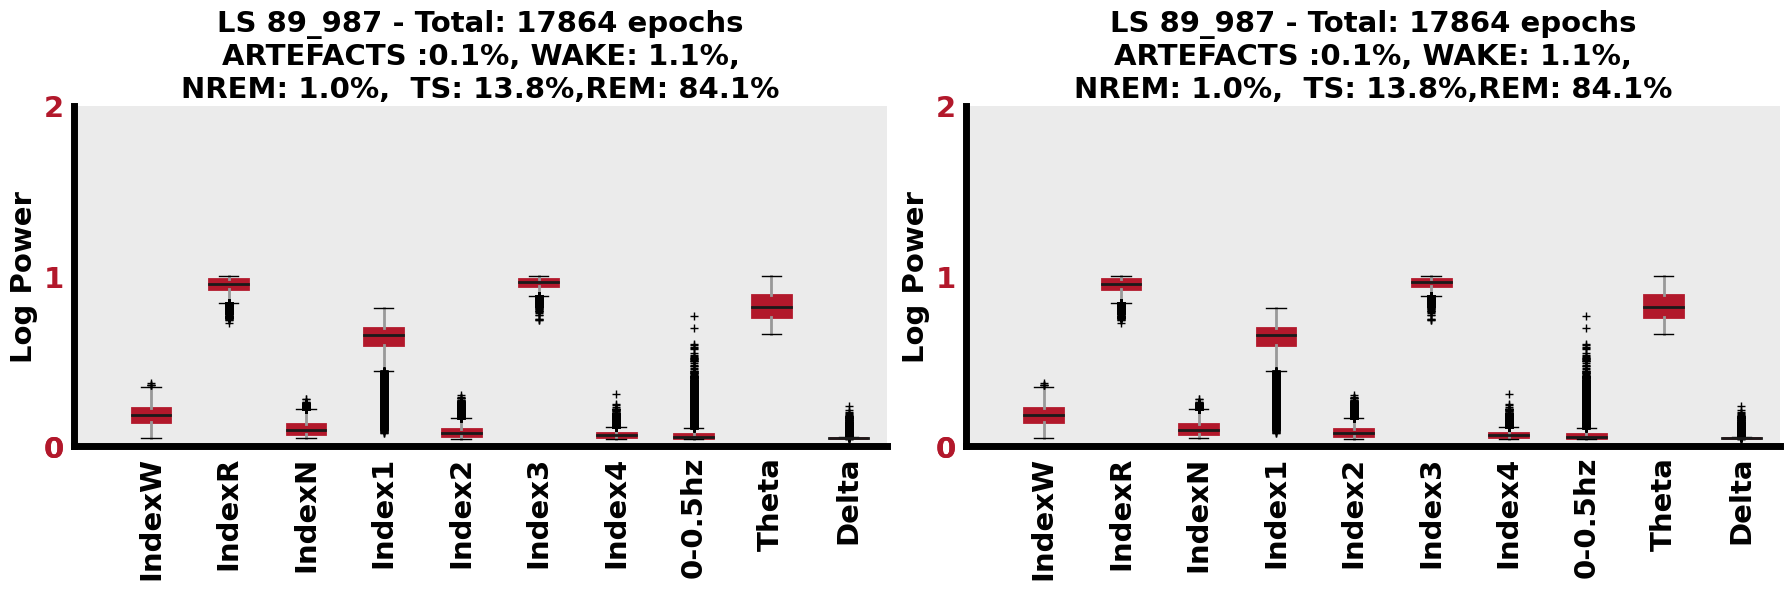

93 : [81, 93, 95]


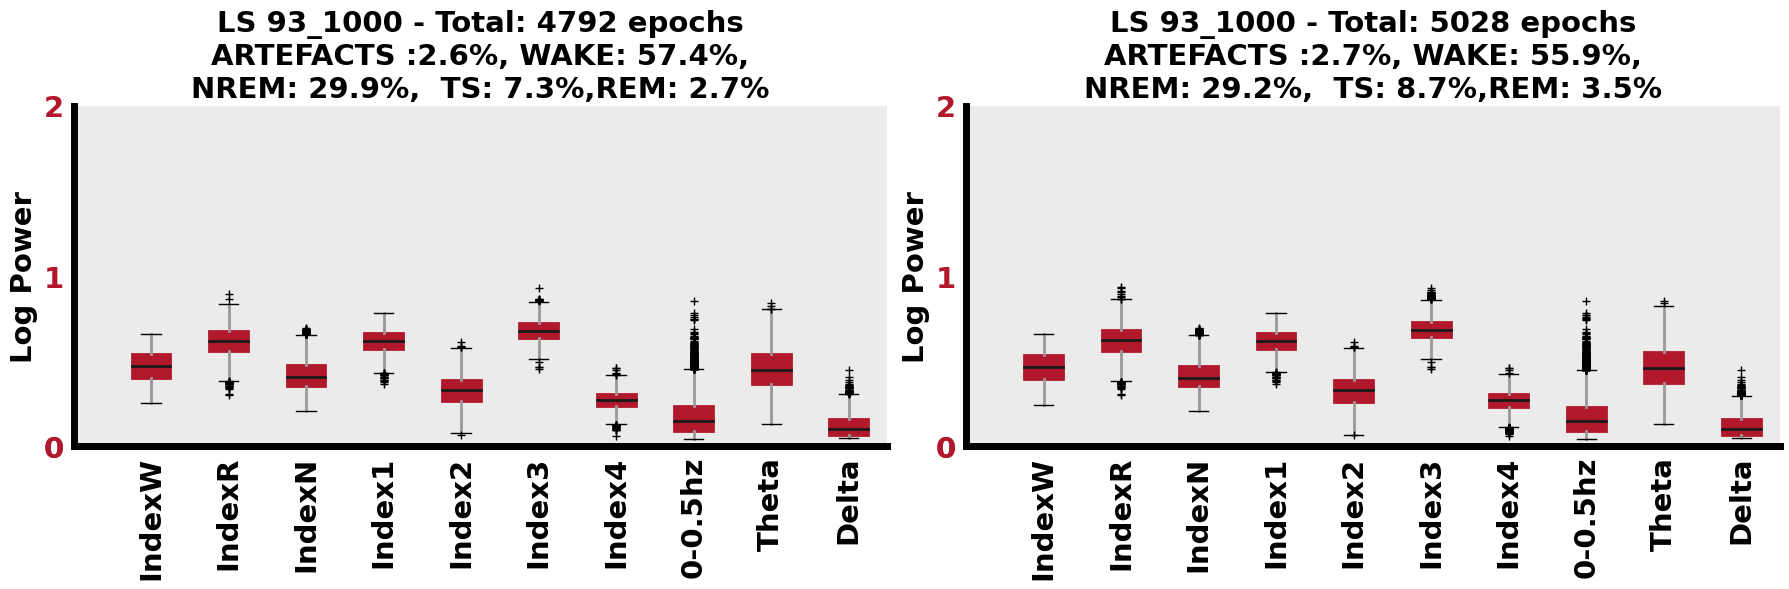

94 : [94]


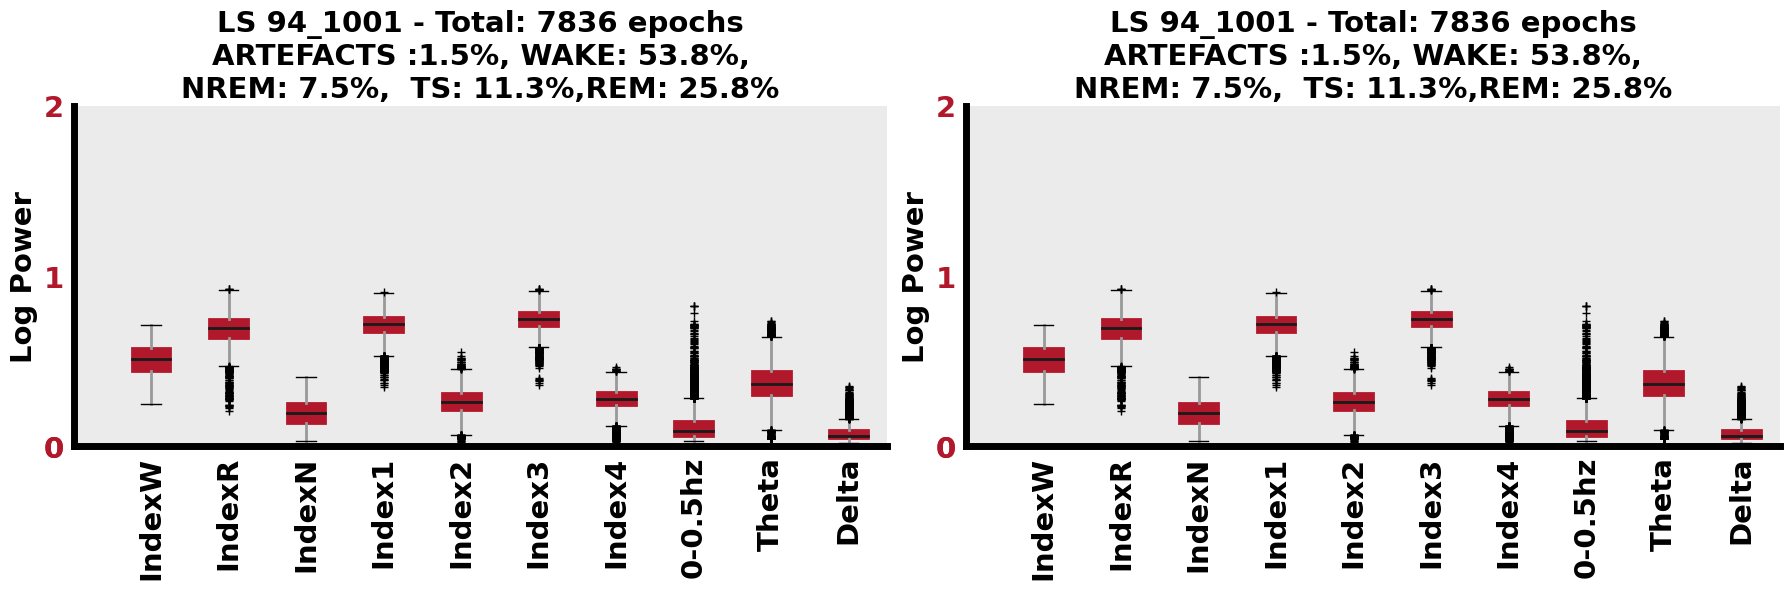

99 : [85, 86, 88, 97, 98, 99]


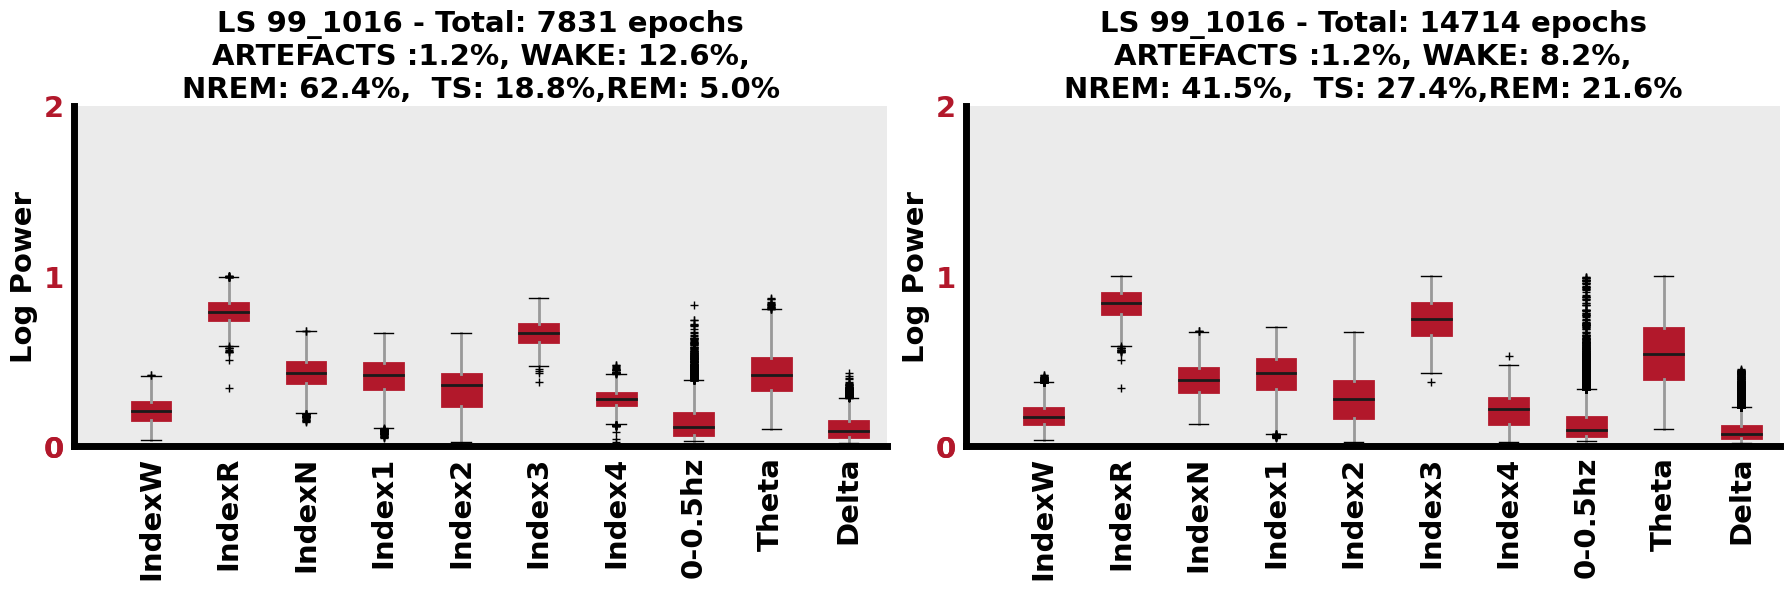

100 : [100]


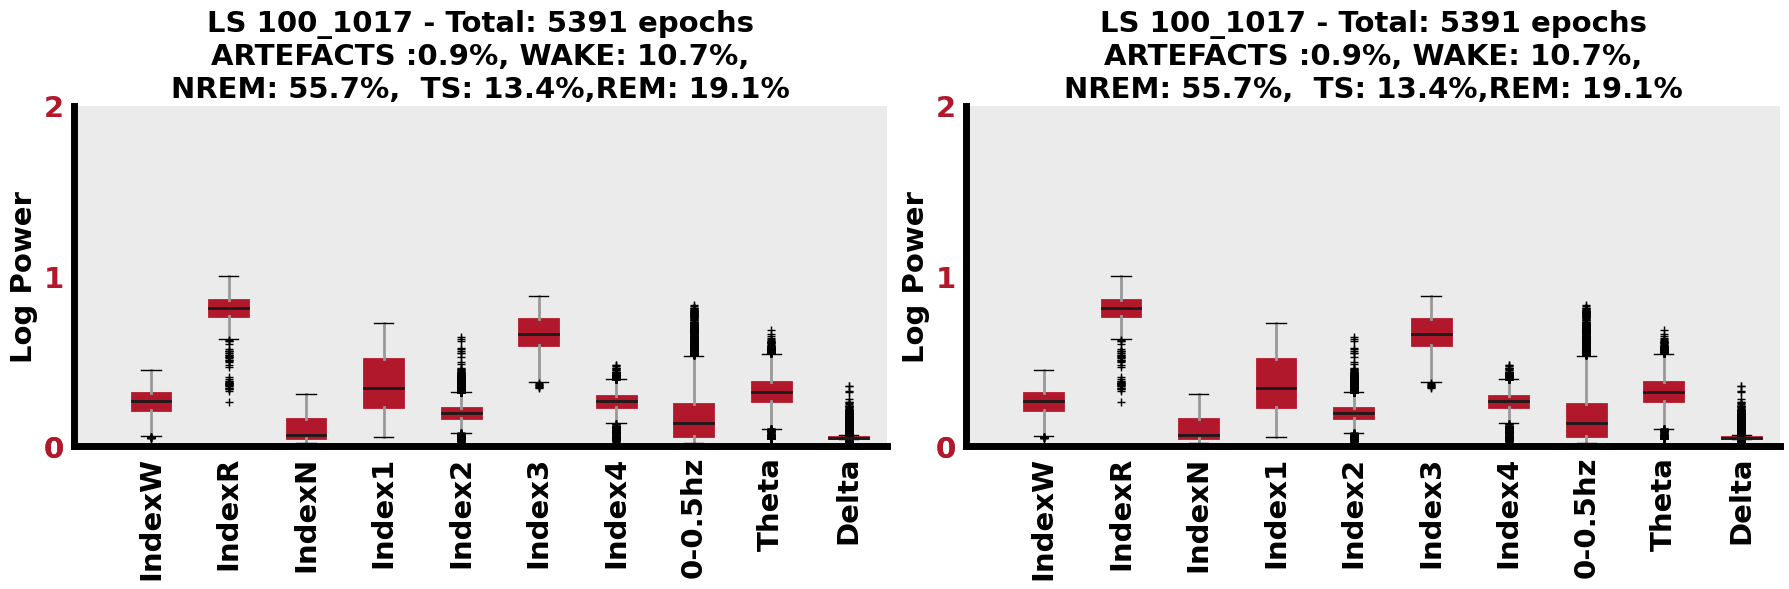

In [48]:
#@title Cluster BoxPlots
for k in clusters.keys():
  if len(clusters[k]) > 0:
    print(f"{k} : {clusters[k]}")
    boxPlots_all_LS_cluster(k)

#Hypnograms

Here we can see the hypnograms for different posttrials

In [49]:
posttrial_number = 217

##Hypnograms computation

In [50]:
#@title get indices
if posttrial_number == 1:
  ind_beg = 0
else :
  ind_beg = int(index_end_posttrials[posttrial_number - 2])
ind_end = int(index_end_posttrials[posttrial_number - 1])

###Pre plots

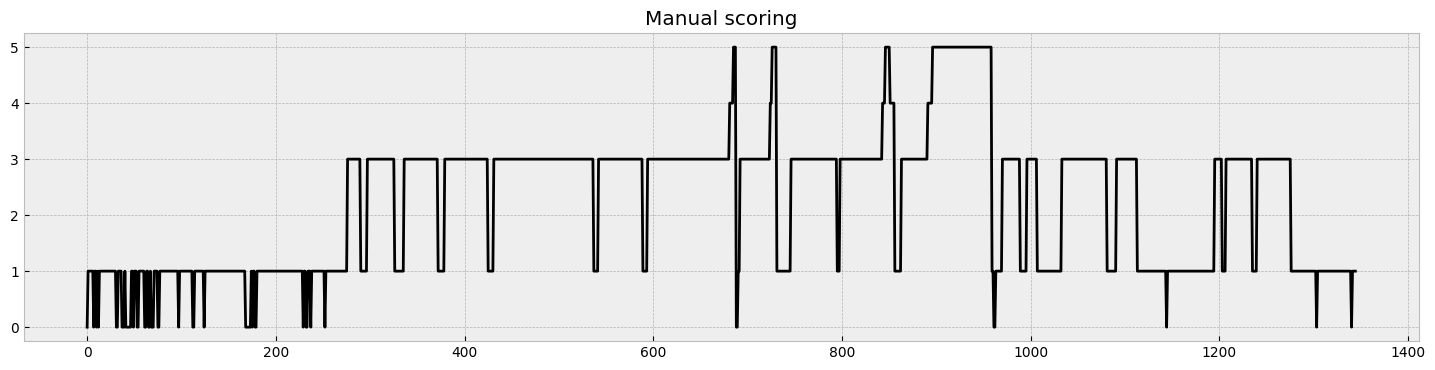

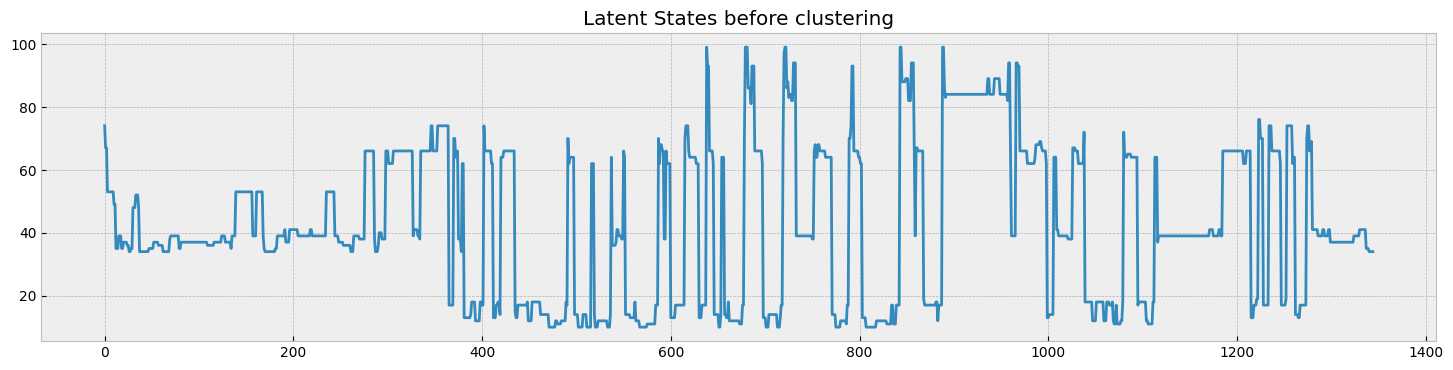

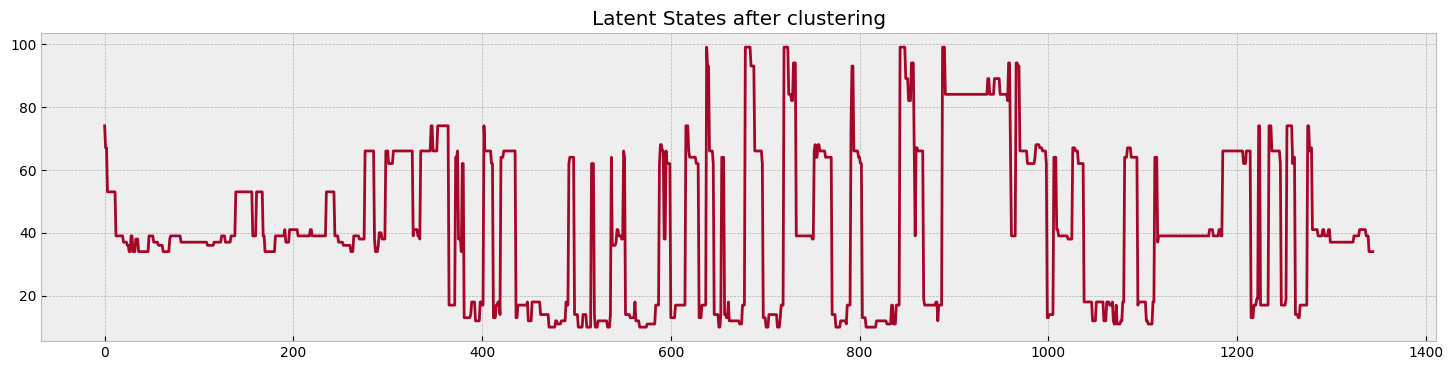

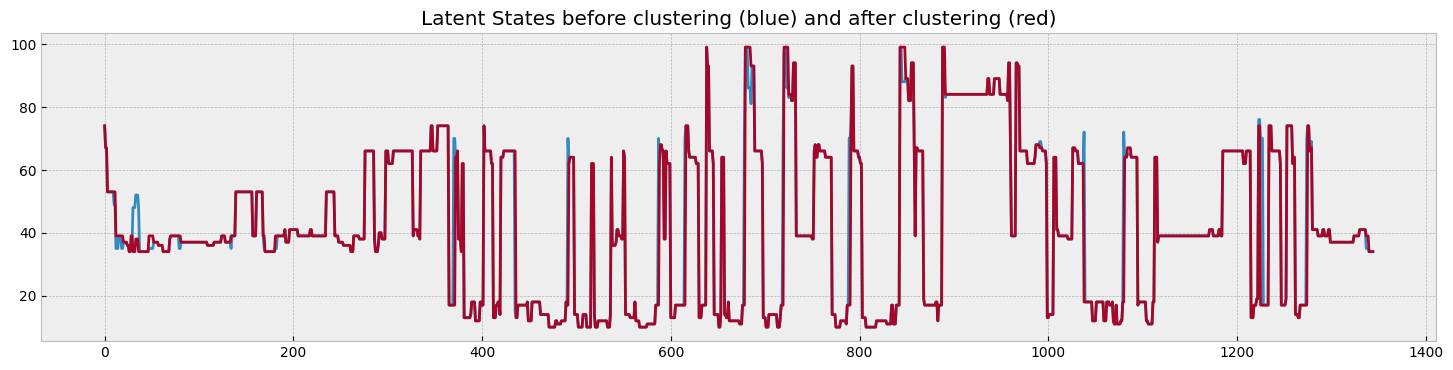

In [51]:
#Plots of the latent states before and after clusterization
plt.figure(figsize=(18, 4))
plt.title("Manual scoring")
plt.plot(manualStates[ind_beg:ind_end], color = "black")

plt.figure(figsize=(18, 4))
plt.title("Latent States before clustering")
plt.plot(latentStates[ind_beg:ind_end])

plt.figure(figsize=(18, 4))
plt.title("Latent States after clustering")
plt.plot(new_latentStates[ind_beg:ind_end], color = "#A60628")

plt.figure(figsize=(18, 4))
plt.title("Latent States before clustering (blue) and after clustering (red)")
plt.plot(latentStates[ind_beg:ind_end])
plt.plot(new_latentStates[ind_beg:ind_end], color = "#A60628")

###Majority inferred States for all LS - Computation

In [52]:
uniqueStatesStr = [''.join(map(str, row[13:].astype(int))) for row in uniqueStates]

In [53]:
majority_inferred_states_all_LS = np.empty(len(np.unique(latentStates)))
for i in uniqueStates[:, 0]:
    bin = uniqueStatesStr[i]
    idx = np.where(obsKeys[:, 1] == i)[0]
    latent_frames = obsKeys[idx, :]
    awake_pct = (len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames)))
    nrem_pct = (len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames)))
    TS_pct = (len(np.where((latent_frames[:,3]==4))[0])/float(len(latent_frames)))
    rem_pct = (len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames)))
    if awake_pct >= nrem_pct and awake_pct >= TS_pct and awake_pct>= rem_pct:
      majority_inferred_states_all_LS[i] = 1
    elif nrem_pct >= rem_pct and nrem_pct >= awake_pct and nrem_pct >= TS_pct:
      majority_inferred_states_all_LS[i] = 3
    elif TS_pct >= awake_pct and TS_pct >= nrem_pct and TS_pct >= rem_pct:
      majority_inferred_states_all_LS[i] = 4
    elif rem_pct >= nrem_pct and rem_pct >= awake_pct and rem_pct >= TS_pct:
      majority_inferred_states_all_LS[i] = 5

In [54]:
is_arte = [el != 0 for el in (obsKeys[:, 3])]

In [55]:
inferred_states = []
inferred_states_arte = []
for i in range(len(obsKeys[:, 1])):
  el = obsKeys[i, 1]
  inferred_states.append(majority_inferred_states_all_LS[el])
  inferred_states_arte.append(majority_inferred_states_all_LS[el] * is_arte[i])

inferred_states_spread = np.repeat(inferred_states, 100)
inferred_states_arte_spread = np.repeat(inferred_states_arte, 100)
time = np.linspace(0, len(inferred_states) * 2, len(inferred_states_spread))

mapped_scores_spread = np.repeat(manualStates, 100)
time_mapped_scores = np.linspace(0, len(manualStates)*2, len(mapped_scores_spread))
time = np.linspace(0, len(inferred_states)*2, len(inferred_states_arte_spread))

###Majority inferred States for clusters - Computation

In [56]:
uniqueStatesStrDico = {}
for el in np.unique(new_latentStates):
  uniqueStatesStrDico[el] = uniqueStatesStr[el]

In [57]:
dicoStates_withArte = {}
c = 0
for i in np.unique(new_latentStates):
  dicoStates_withArte[i] = c
  c += 1

In [58]:
majority_inferred_states_clusters = np.empty(len(np.unique(new_latentStates)))
for i in np.unique(new_latentStates):
    bin = uniqueStatesStrDico[i]
    idx = np.where(new_obsKeys[:, 1] == i)[0]
    latent_frames = new_obsKeys[idx, :]
    awake_pct = (len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames)))
    nrem_pct = (len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames)))
    TS_pct = (len(np.where((latent_frames[:,3]==4))[0])/float(len(latent_frames)))
    rem_pct = (len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames)))
    if awake_pct >= nrem_pct and awake_pct >= TS_pct and awake_pct>= rem_pct:
      majority_inferred_states_clusters[dicoStates_withArte[i]] = 1
    elif nrem_pct >= rem_pct and nrem_pct >= awake_pct and nrem_pct >= TS_pct:
      majority_inferred_states_clusters[dicoStates_withArte[i]] = 3
    elif TS_pct >= awake_pct and TS_pct >= nrem_pct and TS_pct >= rem_pct:
      majority_inferred_states_clusters[dicoStates_withArte[i]] = 4
    elif rem_pct >= nrem_pct and rem_pct >= awake_pct and rem_pct >= TS_pct:
      majority_inferred_states_clusters[dicoStates_withArte[i]] = 5

In [59]:
new_inferred_states = []
new_inferred_states_arte = []
for i in range(len(latentStates)):
  el = new_latentStates[i]
  new_inferred_states.append(majority_inferred_states_clusters[dicoStates_withArte[el]])
  new_inferred_states_arte.append(majority_inferred_states_clusters[dicoStates_withArte[el]] * is_arte[i])

new_inferred_states_spread = np.repeat(new_inferred_states, 100)
new_inferred_states_arte_spread = np.repeat(new_inferred_states_arte, 100)
time = np.linspace(0, len(inferred_states) * 2, len(inferred_states_spread))


###Inferred States

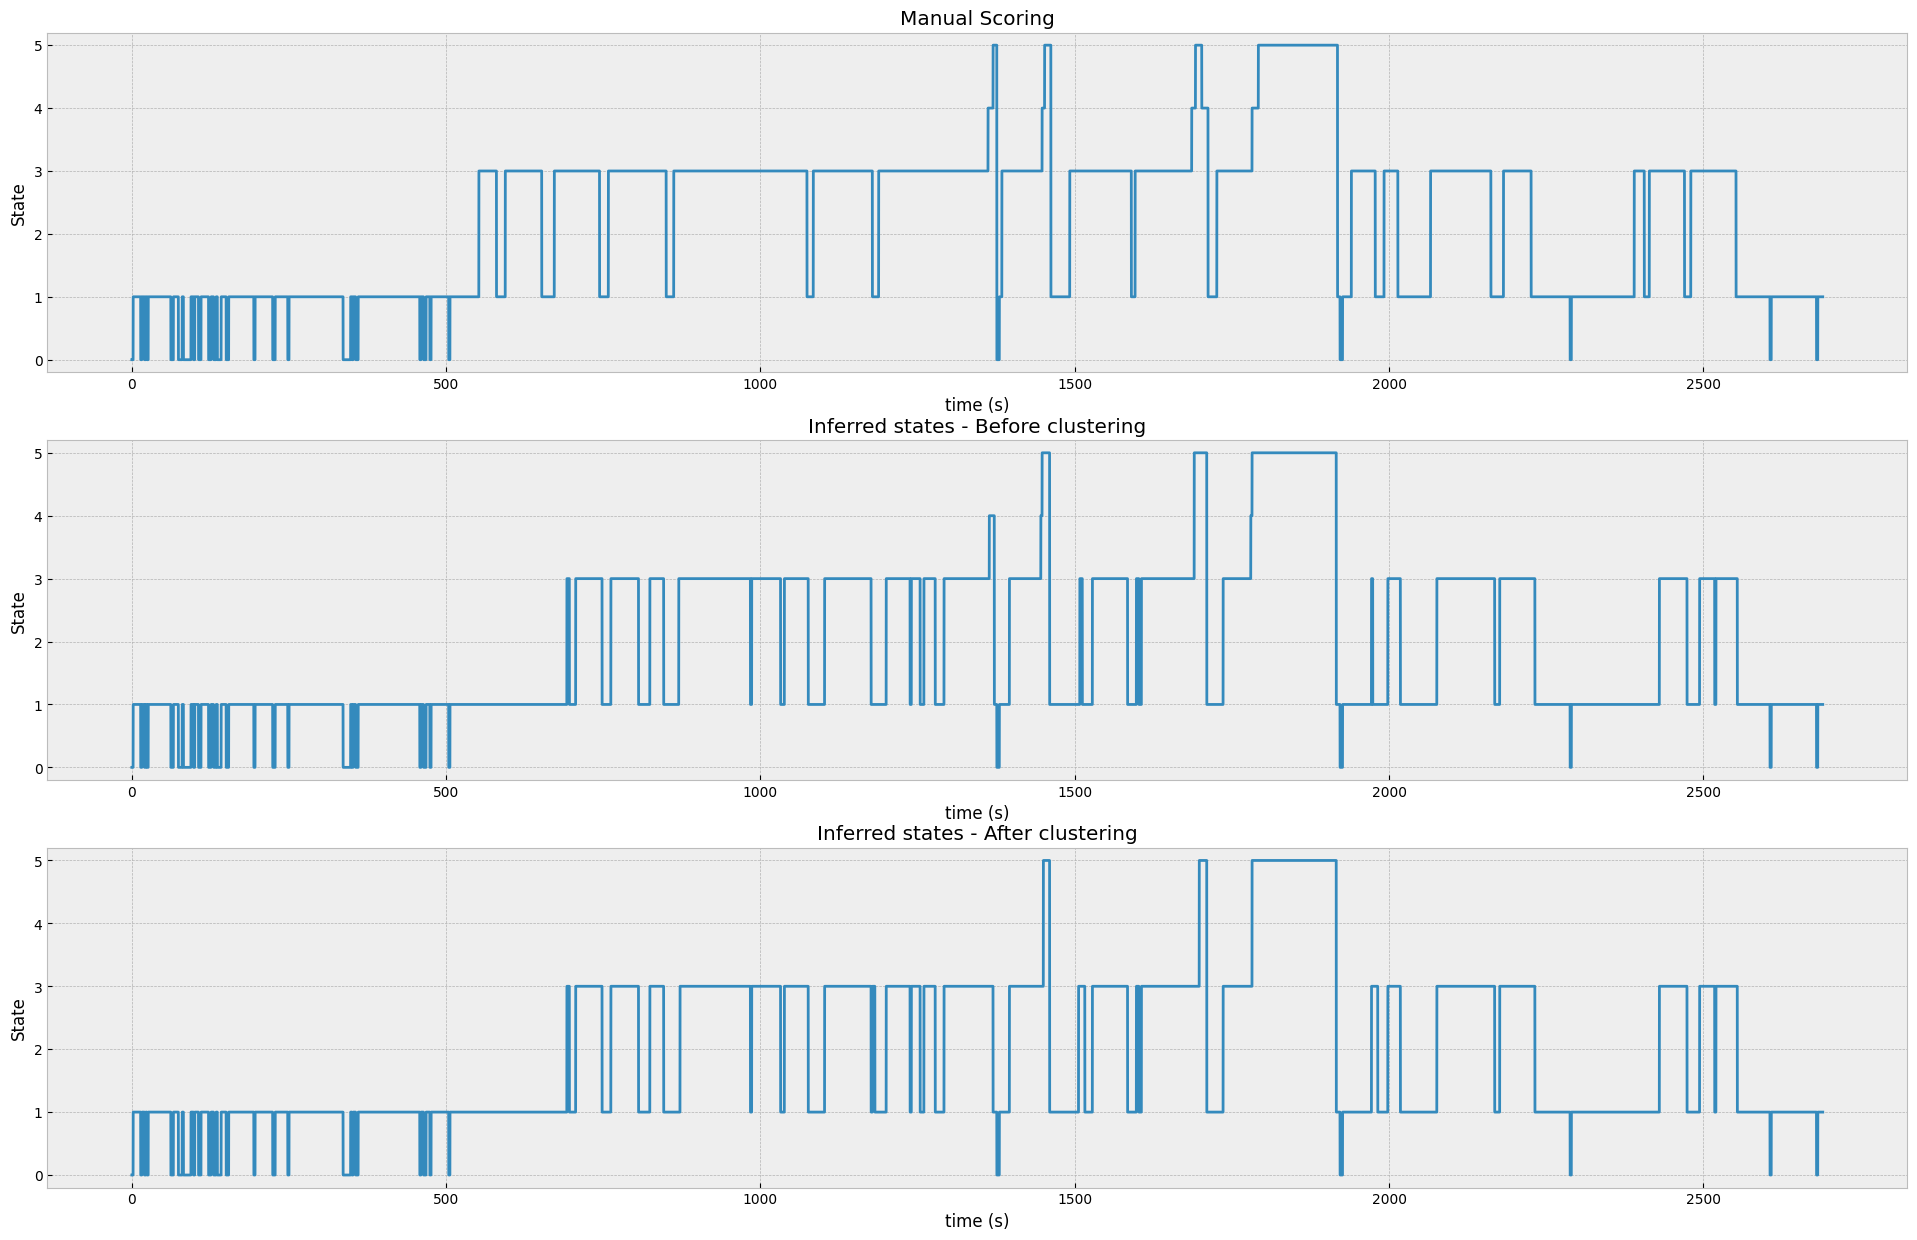

In [60]:
#@title Inferred and manual scoring
plt.figure(figsize = (24,15))
plt.subplot(3, 1, 1)
plt.ylim((-0.2, 5.2))
plt.title("Manual Scoring")
plt.xlabel("time (s)")
plt.ylabel("State")
plt.plot(time_mapped_scores[:(ind_end - ind_beg) *100], mapped_scores_spread[ind_beg * 100 : ind_end *100])

plt.subplot(3, 1, 2)
plt.ylim((-0.2, 5.2))
plt.title("Inferred states - Before clustering")
plt.xlabel("time (s)")
plt.ylabel("State")
plt.plot(time[:(ind_end - ind_beg) *100], inferred_states_arte_spread[ind_beg * 100 : ind_end *100])

plt.subplot(3, 1, 3)
plt.ylim((-0.2, 5.2))
plt.title("Inferred states - After clustering")
plt.xlabel("time (s)")
plt.ylabel("State")
plt.plot(time[:(ind_end - ind_beg) *100], new_inferred_states_arte_spread[ind_beg * 100 : ind_end *100])

plt.show()

#Transition graph - after clustering

##Network Modelling

In [61]:
"""
Computation of the node colors
"""
# colors = ['red is rem', 'green is nrem', 'blue is wake']

node_colors_ac = []
for i in np.unique(np.unique(new_uStates[:,0])):

    idx = np.where(new_obsKeys[:, 1] == i )[0]
    latent_frames = new_obsKeys[idx, :]
    awake_pct = round((len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames))),3)
    nrem_pct = round((len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames))),3)
    rem_pct = round((len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames))),3)

    # print(awake_pct, nrem_pct, rem_pct, LS[i])
    if nrem_pct > awake_pct and nrem_pct > rem_pct: # nrem is green
        # print("nrem")
        node_colors_ac.append("green")
    elif awake_pct > nrem_pct and awake_pct > rem_pct: # awake is blue
        # print("awake")
        node_colors_ac.append("blue")
    elif rem_pct > nrem_pct and rem_pct > awake_pct: #rem is red
        # print("rem")
        node_colors_ac.append("purple")
    else:
      node_colors_ac.append("grey")

##Results

100%|██████████| 2000/2000 [00:03<00:00, 542.34it/s]


BarnesHut Approximation  took  0.52  seconds
Repulsion forces  took  2.03  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.77  seconds
AdjustSpeedAndApplyForces step  took  0.20  seconds


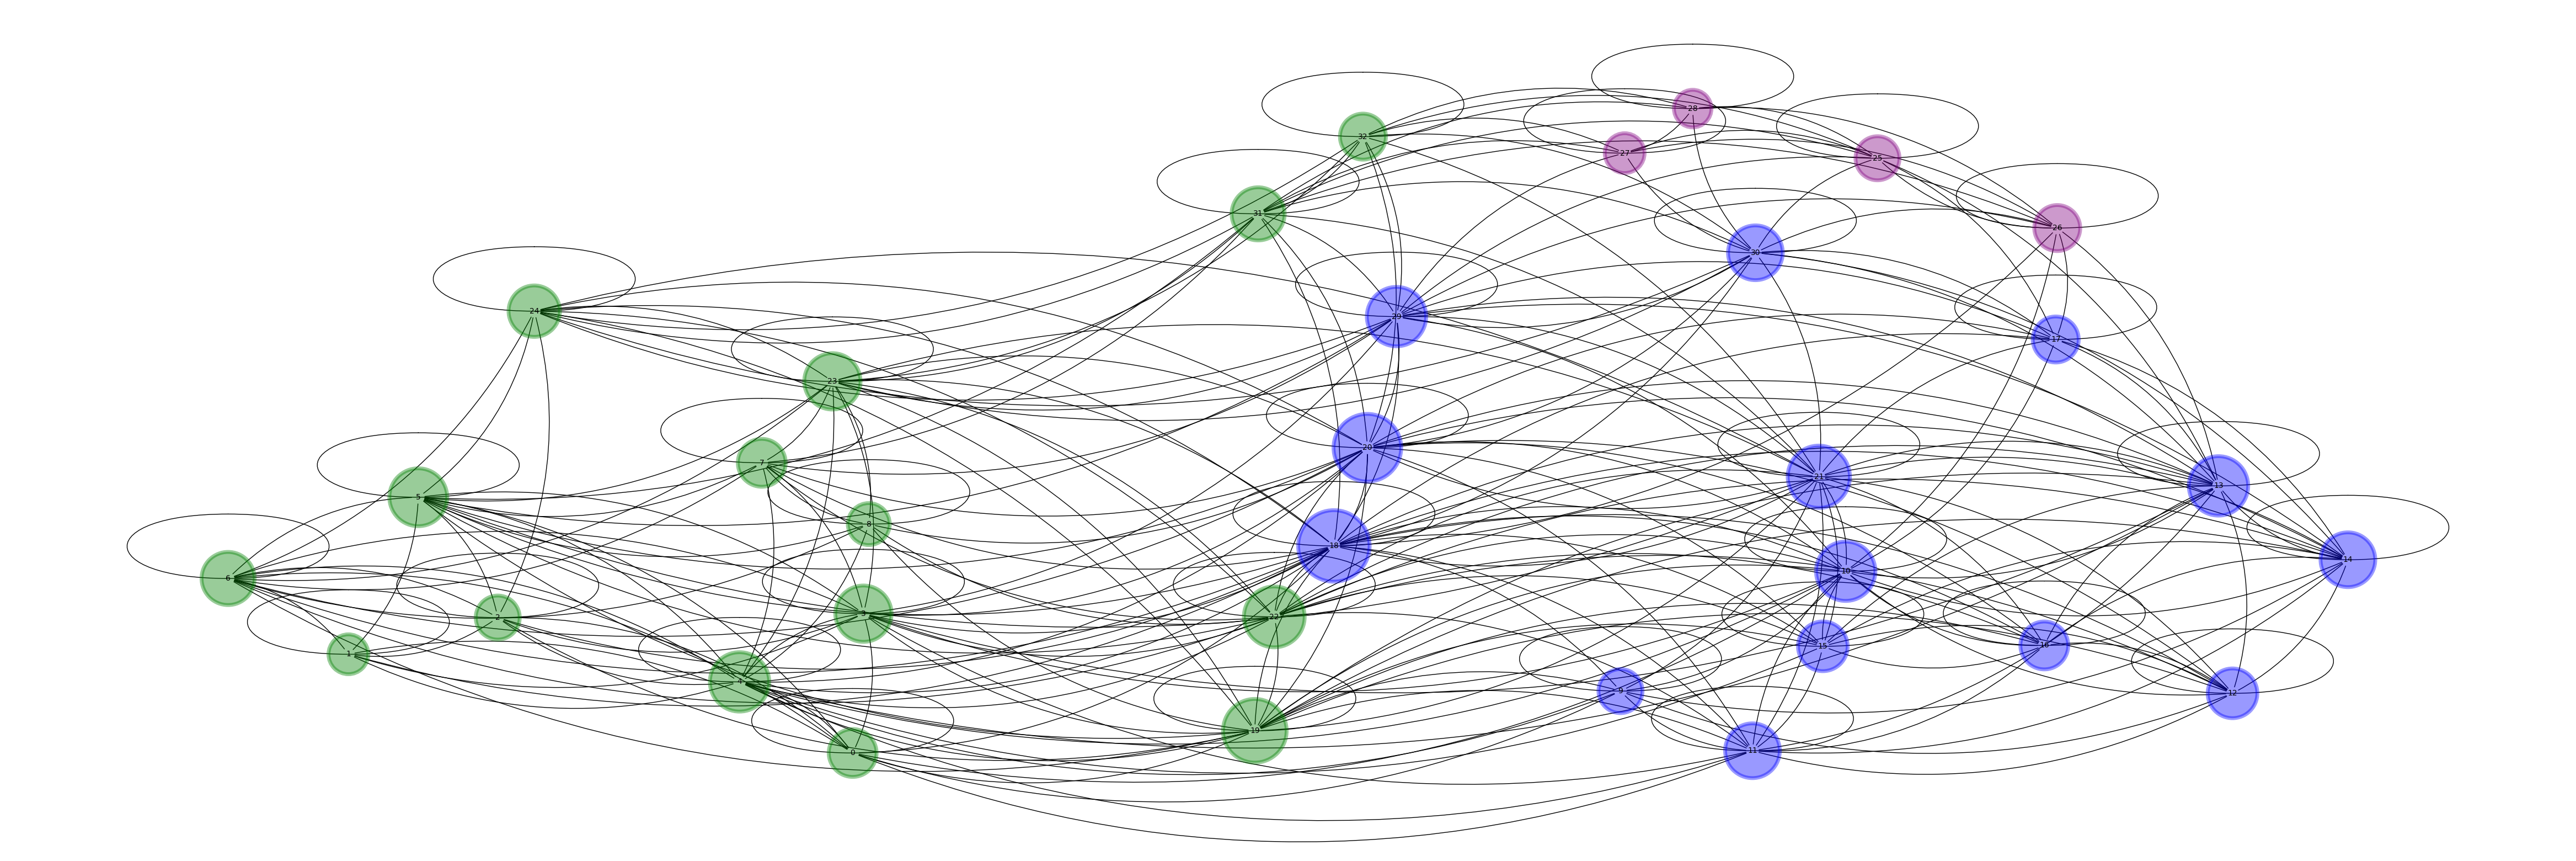

In [63]:
#@title Transition graph
plt.figure(figsize=(60, 20))
"""
For the edge colors we take the z-score(log(transition probability)).
"""

G = nx.from_numpy_array(np.array(M_ephemeral))
# nx.draw(G, with_labels=True)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_colors = cmap(z_score(np.log(edge_weights)))


positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
in_degrees = dict(G.degree())
nx.draw_networkx_nodes(G, positions,
                       node_size=[v*300 for v in in_degrees.values()],
                       node_color=node_colors_ac,
                       alpha=0.4,
                       linewidths = 5)
nx.draw_networkx_edges(G, positions,
                       connectionstyle="arc3,rad=0.2",
                       edge_color="black",
                       alpha=1,
                       arrows=True)
nx.draw_networkx_labels(G, positions, font_size=10, font_family="sans-serif")
plt.axis('off')
plt.show()